Датасет: Students Performance in 2024 JAMB
https://www.kaggle.com/datasets/idowuadamo/students-performance-in-2024-jamb/data


Справка:
JAMB (Joint Admissions and Matriculation Board). 
Единый вступительный экзамен для абитуриентов нигерийских университетов, действителен в течение года и имеет диапазон 0-400 баллов.
Проходной балл 140 для частных и государственных университетов и 100 для политехнических и педагогических колледжей.

Количество столбцов - 17 (16 без ID)
Количество строк - 5000.
Пропуски:
Parent_Education_Level   -  891

Описание данных (проценты округлены до целых):

JAMB_Score - Балл, полученный студентом на экзамене JAMB. Количественная, теоретитчески изменяется от 0 до 400, в данном наборе от 100 до 367 с перевесом в сторону меньших значений. Тип переменной - количественная, дискретная.

Study_Hours_Per_Week - Количество целых часов, которые студент посвящает учебе в неделю. От 0 до 40. По визуализации на кагле напоминает нормальную, но масштабирование графика и p-value этого не подтверждают. Слишком много выбросов (примерно на чётные 4-ём значения). Тип переменной - количественная, дискретная.

Attendance_Rate - Процент дней, в течение которых студент посещал школу в течение учебного года. Тип переменной - количественная, дискретная (считает целлые проценты, т.е. 10 и 11, а не 10.5).

Teacher_Quality - Качество преподавания в школе, оцениваемое по шкале от 1 до 5. Тип переменной - категориальная, ранговая.

Distance_To_School - Расстояние, которое ученик преодолевает, чтобы добраться до учебного заведения, варьируется от 0 до 20 км. На кагле выглядит похожим на нормальное, но  масштабирование графика и p-value этого не подтверждают. Толстые хвосты. Тип переменной - количественная, непрерывная.

School_Type - Тип школы, которую посещает учащийся, 'Public' (75%) или 'Private' (25%). Тип переменной - категориальная, бинарная.
School_Location - Местоположение школы учащегося, 'Urban' (57%) или 'Rural' (43%) Тип переменной - категориальная, бинарная.

Extra_Tutorials - Проходил ли учащийся дополнительные занятия, 'Yes' (54%) или 'No' (46%) . Тип переменной - категориальная, бинарная.

Access_To_Learning_Materials - Имеет ли учащийся доступ к учебным материалам, таким как учебники и интернет-ресурсы, 'Yes' (67%) или 'No' (33%) . Тип переменной - категориальная, бинарная.

Parent_Involvement - Уровень участия родителей или опекунов в обучении учащихся, 'Medium' (40%), 'Low' (38%) или 'High' (22%). Тип переменной - категориальная, ранговая.

IT_Knowledge - указывает на умение учащегося пользоваться компьютером, 'Medium' (39%), 'Low' (37%) или 'High' (24%). Тип переменной - категориальная, ранговая.

Student_ID - Уникальный идентификатор для каждого студента. Тип переменной - категориальная, уникальный идентификатор.

Age - данная единица отражает возраст в целых числах. От 15 до 22 лет.  Примерно одинаковое количество лиц каждого возраста в датасете. Тип переменной - количественная, дискретная.

Gender - Пол студента, 'Female' (51%) или 'Male' (49%). Тип переменной - категориальная, бинарная.

Socioeconomic_Status - Социально-экономическое положение семьи студента, 'Medium' (39%), 'Low' (39%) или 'High' (22%). Тип переменной - категориальная, ранговая.

Parent_Education_Level - Уровень образования родителей (максимальный), 'Secondary' (38%), 'Primary' (32%) или 'Tertiary' (30%). Тип переменной - категориальная, ранговая.

Assignments_Completed - Уровень выполнения заданий студентом, оцениваемый по шкале от 1 до 5. Перевес в сторону низких значений, около 50% -1. Тип переменной - категориальная, ранговая.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest, anderson
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/students-performance-in-2024-jamb/jamb_exam_results.csv


In [4]:
#Отключаем предупреждения в итоговом отчёте
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/kaggle/input/students-performance-in-2024-jamb/jamb_exam_results.csv')
#Номер студента на успеваемость точно не влияет, так что выкидываем его
df=df.drop('Student_ID', axis=1)
activate_all=True
df.head()

JAMB_Score  Study_Hours_Per_Week  Attendance_Rate  Teacher_Quality  \
0         192                    22               78                4   
1         207                    14               88                4   
2         182                    29               87                2   
3         210                    29               99                2   
4         199                    12               98                3   

   Distance_To_School School_Type School_Location Extra_Tutorials  \
0                12.4      Public           Urban             Yes   
1                 2.7      Public           Rural              No   
2                 9.6      Public           Rural             Yes   
3                 2.6      Public           Urban              No   
4                 8.8      Public           Urban              No   

  Access_To_Learning_Materials Parent_Involvement IT_Knowledge  Age  Gender  \
0                          Yes               High       Medium   17    Male   
1                          Yes               High         High   15    Male   
2                          Yes               High       Medium   20  Female   
3                          Yes             Medium         High   22  Female   
4                          Yes             Medium       Medium   22  Female   

  Socioeconomic_Status Parent_Education_Level  Assignments_Completed  
0                  Low               Tertiary                      2  
1                 High                    NaN                      1  
2                 High               Tertiary                      2  
3               Medium               Tertiary                      1  
4               Medium               Tertiary                      1

In [6]:
#Мин, макс, средние и прочие интересные циферки. Никаких нереальных значений в минимуме и максимуме нет 
#кроме, разве 0 в расстоянии до школы, но тут имеется ввиду дистанция уровня соседнее здание, 
#так что без детального рассмотрения распределения вердикт не вынести
#Ну и немного грустно из-за некоторых показателей 
df.describe()

JAMB_Score  Study_Hours_Per_Week  Attendance_Rate  Teacher_Quality  \
count  5000.000000           5000.000000      5000.000000      5000.000000   
mean    174.074600             19.521200        84.235200         2.521400   
std      47.616477              9.634569         9.485688         0.985564   
min     100.000000              0.000000        50.000000         1.000000   
25%     135.000000             13.000000        78.000000         2.000000   
50%     170.000000             19.000000        84.000000         2.000000   
75%     209.000000             26.000000        91.000000         3.000000   
max     367.000000             40.000000       100.000000         5.000000   

       Distance_To_School          Age  Assignments_Completed  
count         5000.000000  5000.000000            5000.000000  
mean            10.005460    18.445800               1.804600  
std              4.820221     2.301504               0.992076  
min              0.000000    15.000000               1.000000  
25%              6.600000    16.000000               1.000000  
50%             10.000000    18.000000               1.000000  
75%             13.400000    20.000000               2.000000  
max             20.000000    22.000000               5.000000

In [7]:
#Смотрим числа находящиеся по середине и сравниваем их со средним значением.
#Разница (может за исключением Assignments_Completed)
#Assignments_Completed всё ещё внушает грусть
df[df.select_dtypes(include=['number']).columns].median()

JAMB_Score               170.0
Study_Hours_Per_Week      19.0
Attendance_Rate           84.0
Teacher_Quality            2.0
Distance_To_School        10.0
Age                       18.0
Assignments_Completed      1.0
dtype: float64

Основная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JAMB_Score                    5000 non-null   int64  
 1   Study_Hours_Per_Week          5000 non-null   int64  
 2   Attendance_Rate               5000 non-null   int64  
 3   Teacher_Quality               5000 non-null   int64  
 4   Distance_To_School            5000 non-null   float64
 5   School_Type                   5000 non-null   object 
 6   School_Location               5000 non-null   object 
 7   Extra_Tutorials               5000 non-null   object 
 8   Access_To_Learning_Materials  5000 non-null   object 
 9   Parent_Involvement            5000 non-null   object 
 10  IT_Knowledge                  5000 non-null   object 
 11  Age                           5000 non-null   int64  
 12  Gender                        5000 non-nu

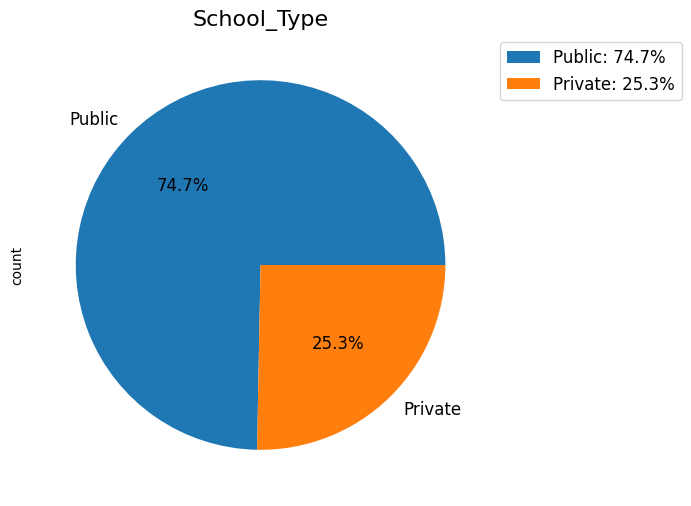


School_Location:
School_Location
Urban    0.5668
Rural    0.4332
Name: proportion, dtype: float64


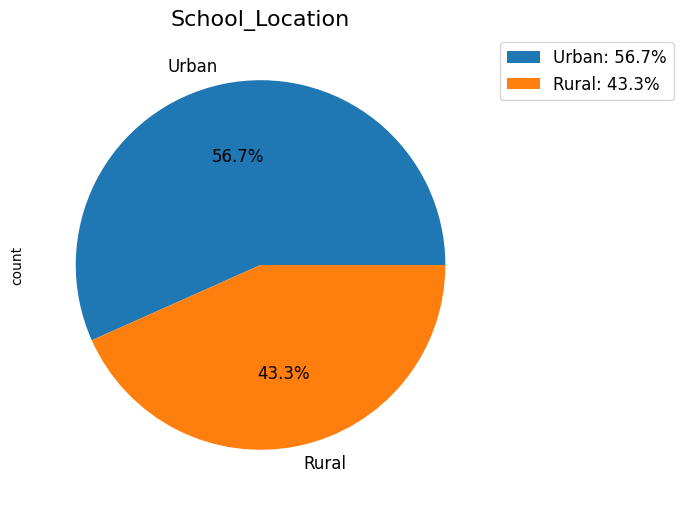


Extra_Tutorials:
Extra_Tutorials
Yes    0.5442
No     0.4558
Name: proportion, dtype: float64


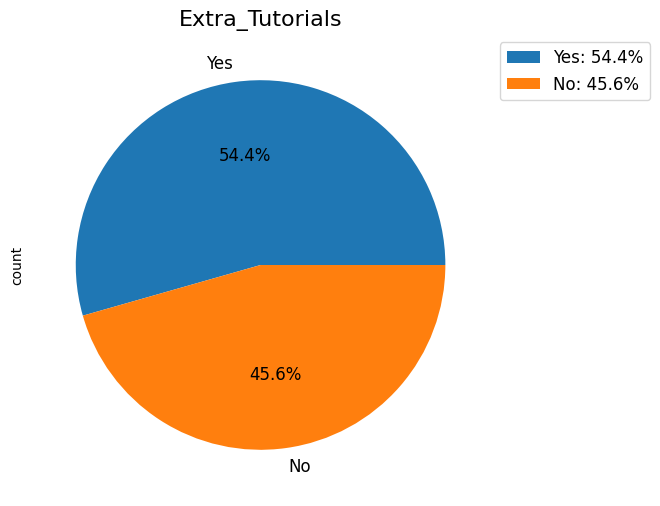


Access_To_Learning_Materials:
Access_To_Learning_Materials
Yes    0.6692
No     0.3308
Name: proportion, dtype: float64


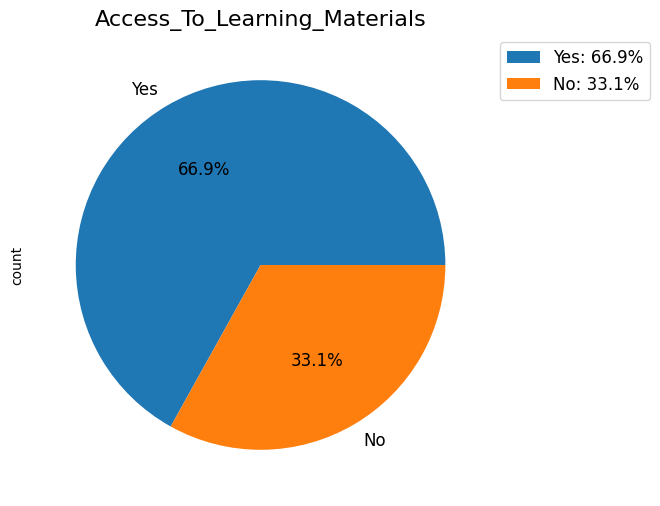


Parent_Involvement:
Parent_Involvement
Medium    0.4024
Low       0.3754
High      0.2222
Name: proportion, dtype: float64


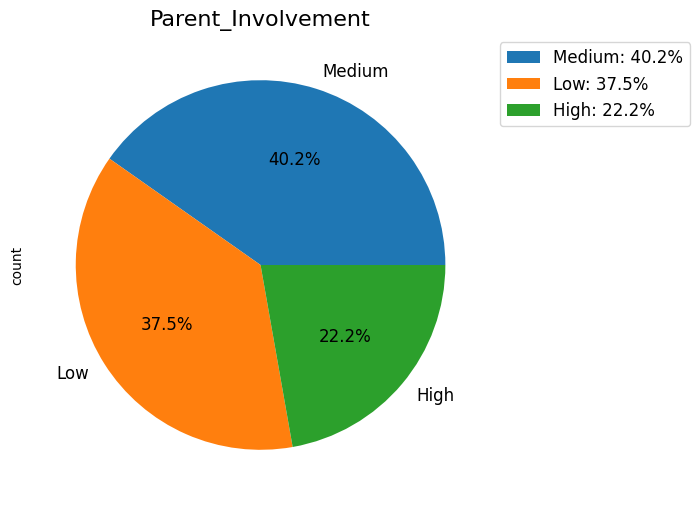


IT_Knowledge:
IT_Knowledge
Medium    0.3940
Low       0.3684
High      0.2376
Name: proportion, dtype: float64


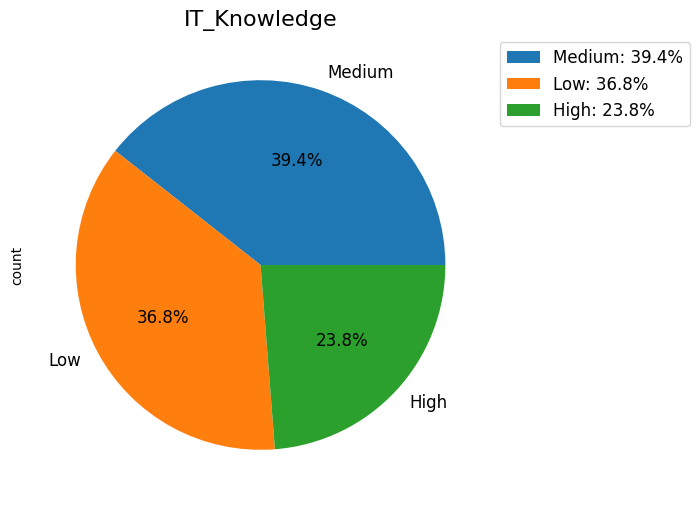


Gender:
Gender
Female    0.506
Male      0.494
Name: proportion, dtype: float64


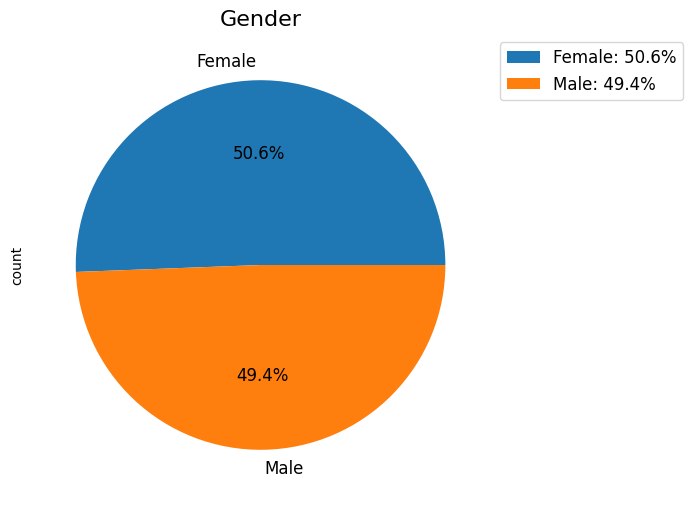


Socioeconomic_Status:
Socioeconomic_Status
Medium    0.3934
Low       0.3902
High      0.2164
Name: proportion, dtype: float64


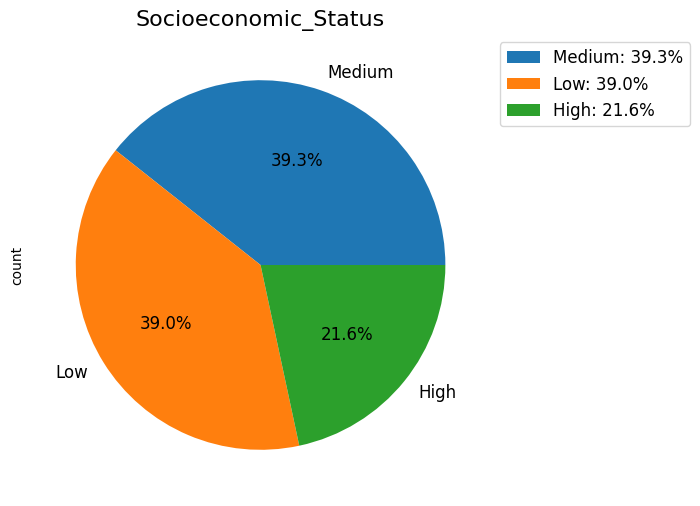


Parent_Education_Level:
Parent_Education_Level
Secondary    0.378681
Primary      0.324897
Tertiary     0.296422
Name: proportion, dtype: float64


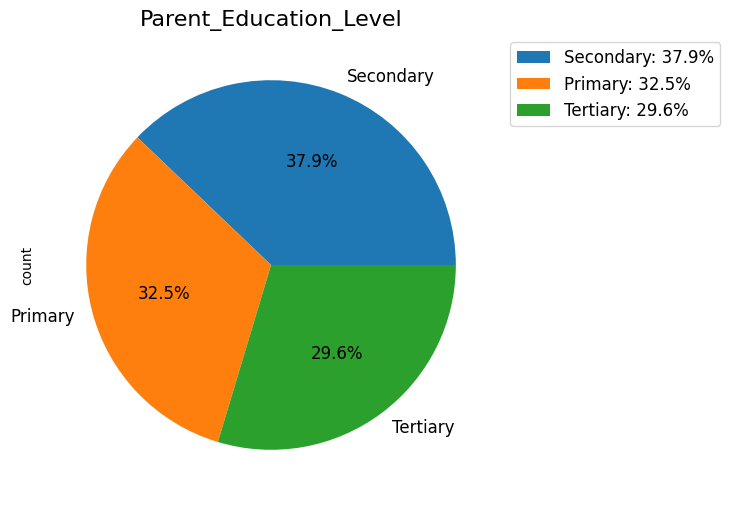

In [8]:
def basic_info(df):
    print("Основная информация:")
    print(df.info())
    print("\nПропущенные значения в числах:")
    print(df.isnull().sum())
    print('\nПропущенные значения в процентах')
    print(df.isnull().sum()/df.count()[0]*100)


def class_balance(df):
    print("Что у нас там по классам и нет ли там случаев 99% и более в одном классе:")
    for column in df.select_dtypes(include=['object', 'category']).columns:
        print(f"\n{column}:")
        print(df[column].value_counts(normalize=True))
        plt.figure(figsize=(12, 6))
        top = df[column].value_counts().head(5)
        top.plot.pie(autopct='%1.1f%%', fontsize=12)
        plt.title(column, fontsize=16)
        plt.legend([f'{i}: {j:.1f}%' for i, j in zip(top.index, top/top.sum()*100)], loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)
        plt.show()

#Видим пропуски в Parent_Education_Level. 
basic_info(df)
#Когда было лень кроить ф-цию, но не лень менять тип данных чтобы посмотреть проценты
df['Assignments_Completed']=df['Assignments_Completed'].astype('string')
df['Teacher_Quality']=df['Teacher_Quality'].astype('string')
df['Age']=df['Age'].astype('string')
class_balance(df)
df['Assignments_Completed']=df['Assignments_Completed'].astype('int64')
df['Teacher_Quality']=df['Teacher_Quality'].astype('int64')
df['Age']=df['Age'].astype('int64')

In [9]:
#Переводим категориальные переменные в цифры
df['Parent_Involvement'] = df['Parent_Involvement'].replace({'Low': 0, 'Medium': 1, 'High': 2})
df['IT_Knowledge'] = df['IT_Knowledge'].replace({'Low': 0, 'Medium': 1, 'High': 2})
df['Socioeconomic_Status'] = df['Socioeconomic_Status'].replace({'Low': 0, 'Medium': 1, 'High': 2})


Что у нас там по классам и нет ли там случаев 99% и более в одном классе:

Parent_Education_Level:
Parent_Education_Level
Secondary    0.378681
Primary      0.324897
Tertiary     0.296422
Name: proportion, dtype: float64


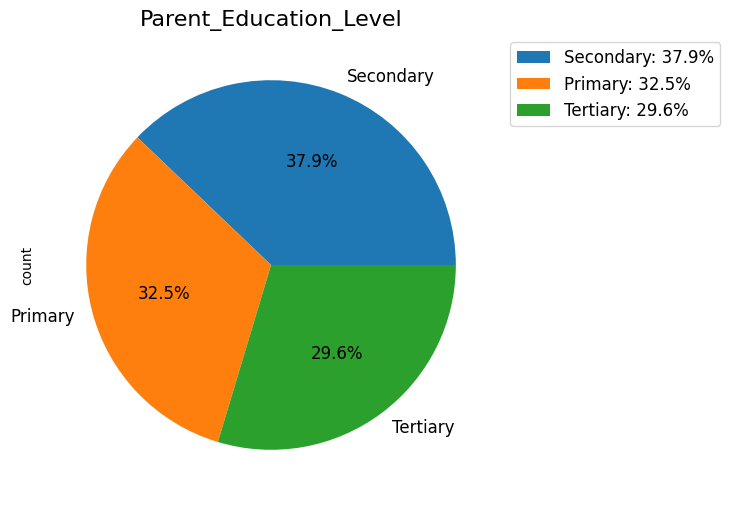

In [8]:
#так как будем крутить этот параметр - выведем его отдельно (чтобы сравнивать насколько мы там всё поломаем)
#Age - по сути мини костылёк во избежание ошибок
class_balance(df[['Parent_Education_Level', 'Age']])

Что у нас там по классам и нет ли там случаев 99% и более в одном классе:

Parent_Education_Level:
Parent_Education_Level
Secondary    0.4894
Primary      0.2670
Tertiary     0.2436
Name: proportion, dtype: float64


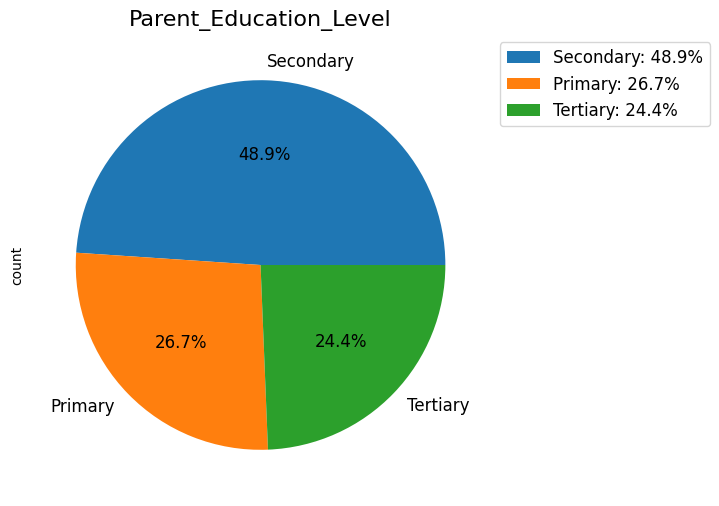

In [9]:
#берём наиболее часто значение на родителя. 
#Как видиим распределение классов резко меняется, да и в целом... не совсем мой любимый вариант. Всё-таки не факт что потерялись именно самые частые значения
df1=df.fillna({'Parent_Education_Level':df.Parent_Education_Level.mode()[0]}).copy()
class_balance(df1[['Parent_Education_Level', 'Age']])

Что у нас там по классам и нет ли там случаев 99% и более в одном классе:

Parent_Education_Level:
Parent_Education_Level
Secondary    0.3112
Primary      0.2670
Tertiary     0.2436
no_data      0.1782
Name: proportion, dtype: float64


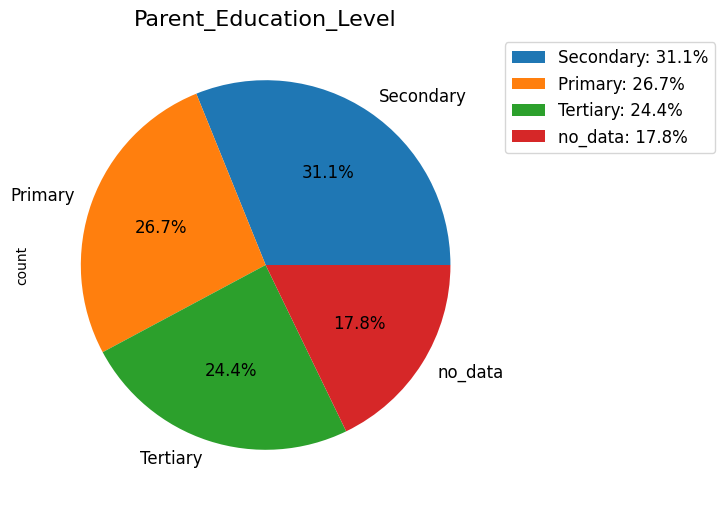

In [10]:
#заводим отдельный класс под потеряшек. 
#В принципе может быть рабочим "ленивым" вариантом. В конце концов, иногда отсутствие данных само по себе данные
#и то что именно по этим родителям нет данных об образовании может говорить как о не идеальном сборе данных так и о чём-то более интересном
#Склоняюсь именно к этому варианту (тем более ниже корреляционный анализ показывает интересные данные, подкрепляющие гипотезу о том что это не только не качественная работа по сбору данных)
df3=df.fillna({'Parent_Education_Level':'no_data'}).copy()
class_balance(df3[['Parent_Education_Level', 'Age']])

Что у нас там по классам и нет ли там случаев 99% и более в одном классе:

Parent_Education_Level:
Parent_Education_Level
Primary      0.4048
Secondary    0.3448
Tertiary     0.2504
Name: proportion, dtype: float64


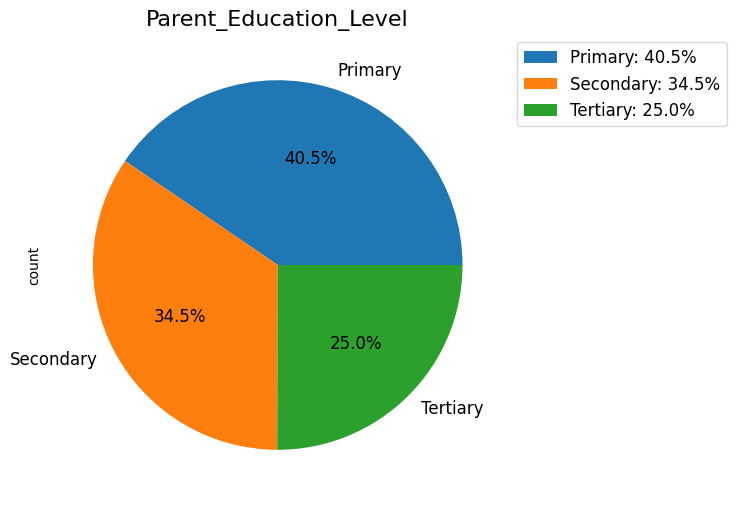

In [11]:
#заполняем наиболее частым значением, но не по всему датасету, а по логичным 
#связанным признакам
n=df.Parent_Education_Level.isnull()
df2=df.copy()
for i in (df2.IT_Knowledge.unique()):
    for j in (df2.Socioeconomic_Status.unique()):
        tf=(df2.IT_Knowledge==i)&(df2.Socioeconomic_Status==j)
        if sum(tf)>0:
            df2.loc[tf & n, 'Parent_Education_Level']=df2.loc[tf & (~n), 'Parent_Education_Level'].mode()[0]
class_balance(df2[['Parent_Education_Level', 'Age']])

Что у нас там по классам и нет ли там случаев 99% и более в одном классе:

Parent_Education_Level:
Parent_Education_Level
Primary      0.4058
Secondary    0.3438
Tertiary     0.2504
Name: proportion, dtype: float64


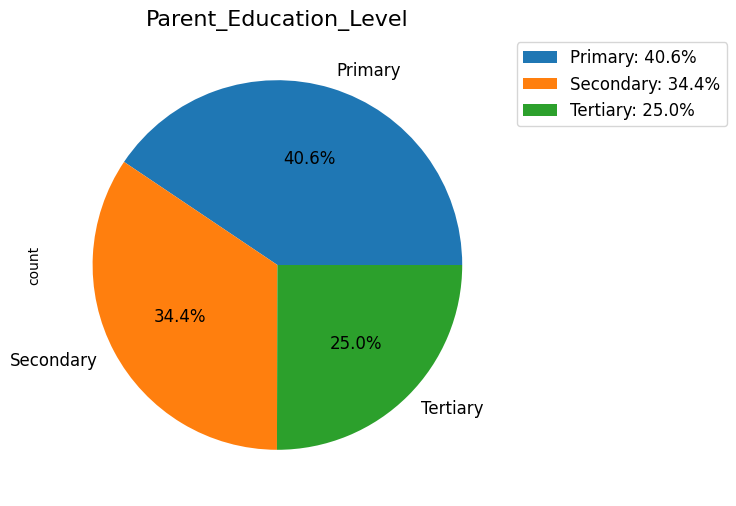

In [12]:
#заполняем наиболее частым значением, но не по всему датасету, а по логичным 
#связанным признакам *2 (за счёт 2 колонок связь которых с образованием родителей спорна)
#Проценты не особо значимо отличаются
n=df.Parent_Education_Level.isnull()
df4=df.copy()
for i in (df4.IT_Knowledge.unique()):
    for j in (df4.Socioeconomic_Status.unique()):
        for h in (df4.School_Type.unique()):
            for g in (df4.School_Location.unique()):
                tf=(df4.IT_Knowledge==i)&(df4.Socioeconomic_Status==j)&(df4.School_Type==h)&(df4.School_Location==g)
                if sum(tf)>0:
                    df4.loc[tf & n, 'Parent_Education_Level']=df4.loc[tf & (~n), 'Parent_Education_Level'].mode()[0]
class_balance(df4[['Parent_Education_Level', 'Age']])

Что у нас там по классам и нет ли там случаев 99% и более в одном классе:

Parent_Education_Level:
Parent_Education_Level
Secondary    0.4702
Primary      0.2862
Tertiary     0.2436
Name: proportion, dtype: float64


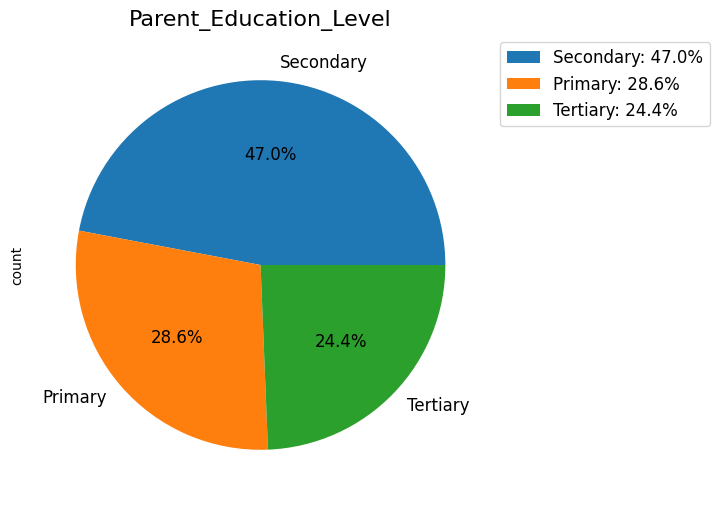

In [13]:
#заполняем наиболее частым значением, но не по всему датасету, а по логичным 
#связанным признакам
n=df.Parent_Education_Level.isnull()
df5=df.copy()
for i in (df5.IT_Knowledge.unique()):
    for j in (df5.School_Type.unique()):
        tf=(df5.IT_Knowledge==i)&(df5.School_Type==j)
        if sum(tf)>0:
            df5.loc[tf & n, 'Parent_Education_Level']=df5.loc[tf & (~n), 'Parent_Education_Level'].mode()[0]
class_balance(df5[['Parent_Education_Level', 'Age']])

In [11]:
#В итоге берём один из вариантов заполнения. Решил взять вариант с отствие данных - тоже данные из-за выявленной корреляции отсутствия значения и более низкими иными признаками
#Смотрел через деми
df=df3

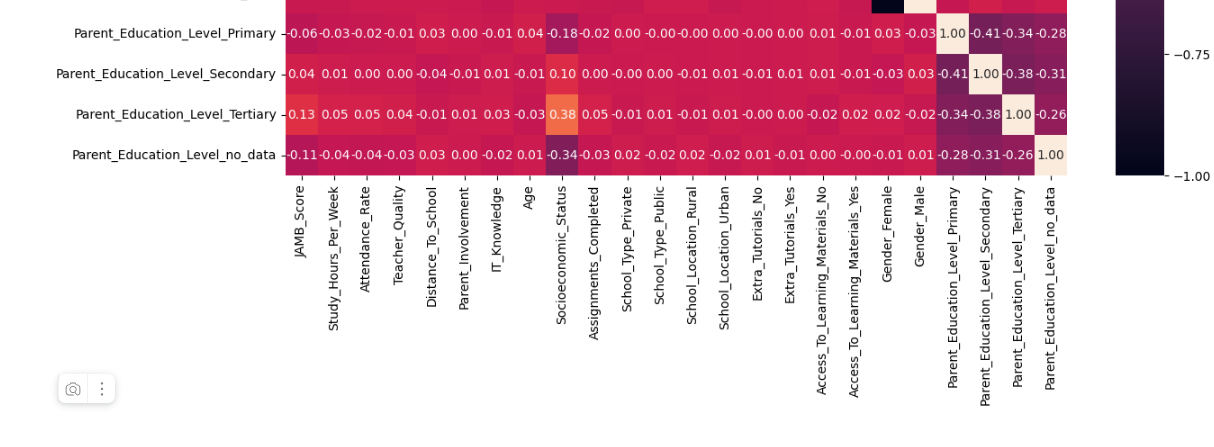

In [12]:
df['Parent_Education_Level'] = df['Parent_Education_Level'].replace({'no_data': 0, 'Primary': 1, 'Secondary': 2, 'Tertiary': 3})

In [13]:
#Перепроверяем
basic_info(df)

Основная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JAMB_Score                    5000 non-null   int64  
 1   Study_Hours_Per_Week          5000 non-null   int64  
 2   Attendance_Rate               5000 non-null   int64  
 3   Teacher_Quality               5000 non-null   int64  
 4   Distance_To_School            5000 non-null   float64
 5   School_Type                   5000 non-null   object 
 6   School_Location               5000 non-null   object 
 7   Extra_Tutorials               5000 non-null   object 
 8   Access_To_Learning_Materials  5000 non-null   object 
 9   Parent_Involvement            5000 non-null   int64  
 10  IT_Knowledge                  5000 non-null   int64  
 11  Age                           5000 non-null   int64  
 12  Gender                        5000 non-nu

In [17]:
#и отдельно смотрим проценты по нашим признакам от 1 до 5
df.Teacher_Quality.value_counts()/df.Teacher_Quality.count()

Teacher_Quality
2    0.3514
3    0.3338
1    0.1550
4    0.1368
5    0.0230
Name: count, dtype: float64

In [18]:
df.Assignments_Completed.value_counts()/df.Teacher_Quality.count()

Assignments_Completed
1    0.5068
2    0.2706
3    0.1470
4    0.0624
5    0.0132
Name: count, dtype: float64

Смотрим распределения и проверяем их на нормальность:

JAMB_Score:
Shapiro-Wilk Test - Statistic: 0.9676150436531823, p-value: 3.955364011000103e-32
D'Agostino and Pearson's Test - Statistic: 189.19241533335776, p-value: 8.267781704957325e-42
Anderson-Darling Test - Statistic: 33.83504072222331
Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]


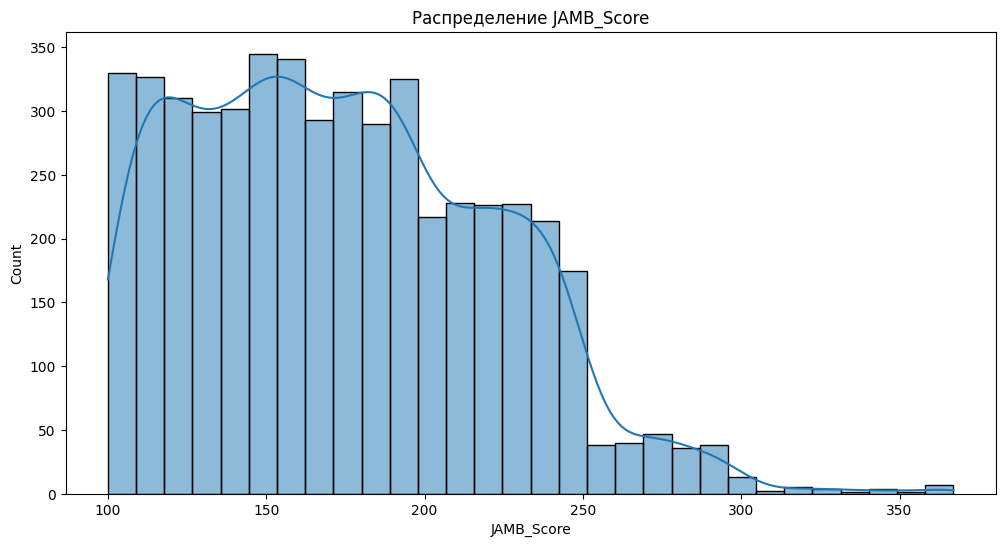


Study_Hours_Per_Week:
Shapiro-Wilk Test - Statistic: 0.9882248421347383, p-value: 5.1453493548280286e-20
D'Agostino and Pearson's Test - Statistic: 140.46862048717225, p-value: 3.1450432411440988e-31
Anderson-Darling Test - Statistic: 7.02408570476473
Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]


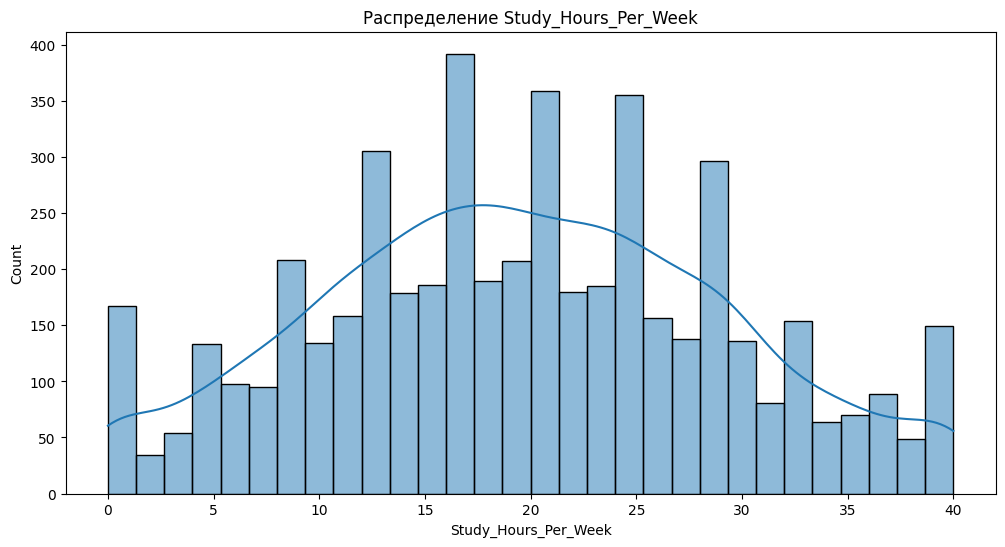


Attendance_Rate:
Shapiro-Wilk Test - Statistic: 0.9812485477454596, p-value: 3.2871959981632387e-25
D'Agostino and Pearson's Test - Statistic: 88.60945912001289, p-value: 5.737205814291133e-20
Anderson-Darling Test - Statistic: 13.00090193223059
Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]


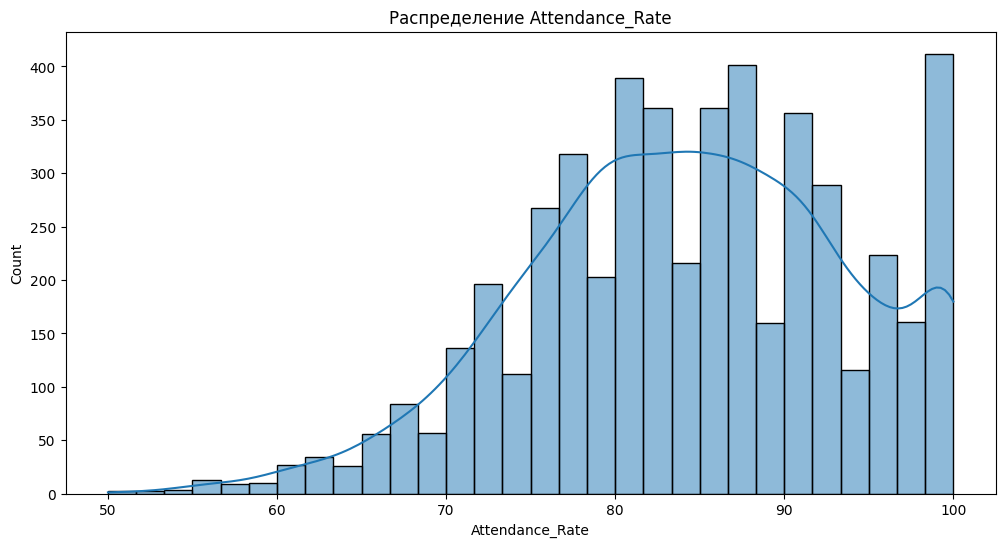


Teacher_Quality:
Shapiro-Wilk Test - Statistic: 0.8997445567059599, p-value: 2.973924503720092e-49
D'Agostino and Pearson's Test - Statistic: 123.78724096780932, p-value: 1.318081179245836e-27
Anderson-Darling Test - Statistic: 214.1892183733671
Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]


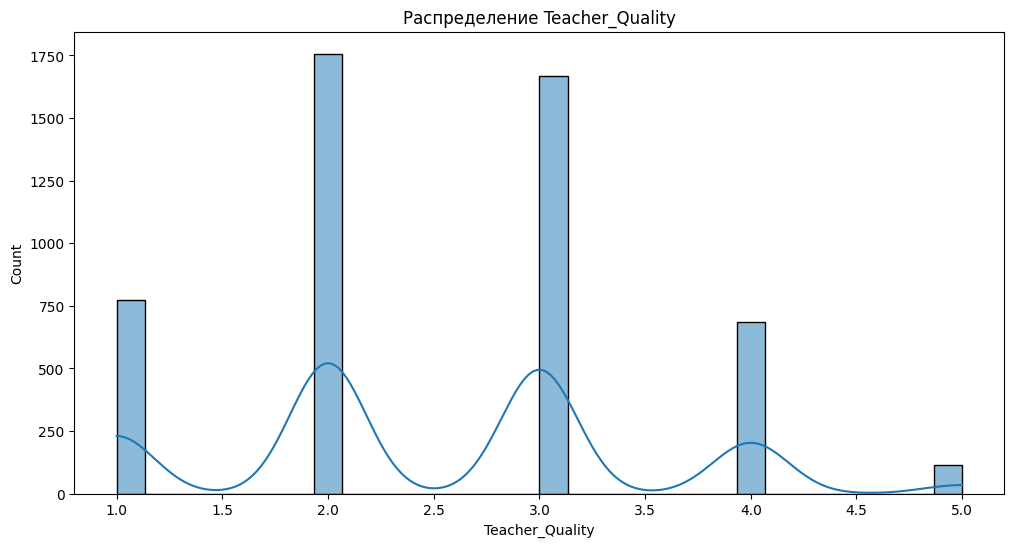


Distance_To_School:
Shapiro-Wilk Test - Statistic: 0.9890600512272256, p-value: 2.9795781525747395e-19
D'Agostino and Pearson's Test - Statistic: 150.21468043475966, p-value: 2.4060053747000886e-33
Anderson-Darling Test - Statistic: 5.068265324107415
Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]


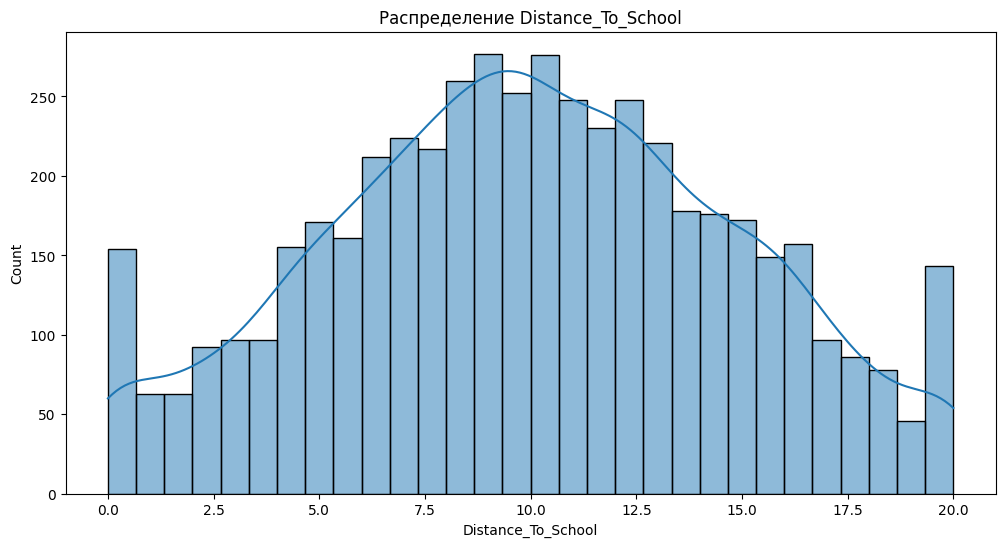


Parent_Involvement:
Shapiro-Wilk Test - Statistic: 0.7985439932390054, p-value: 1.0014865619776424e-61
D'Agostino and Pearson's Test - Statistic: 5288.576596630948, p-value: 0.0
Anderson-Darling Test - Statistic: 409.7975160912456
Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]


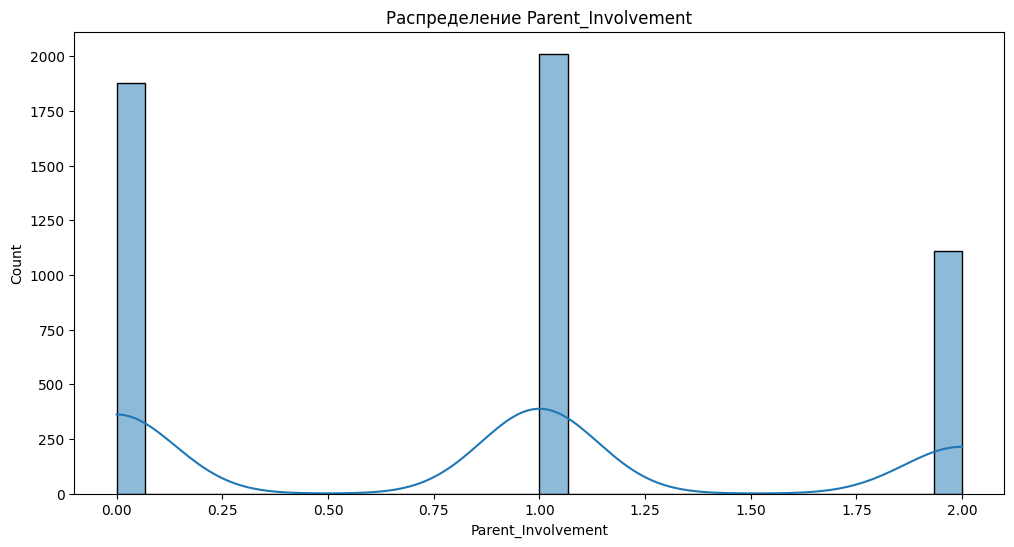


IT_Knowledge:
Shapiro-Wilk Test - Statistic: 0.799587346199458, p-value: 1.2554727952423067e-61
D'Agostino and Pearson's Test - Statistic: 9979.921534583462, p-value: 0.0
Anderson-Darling Test - Statistic: 404.5927980275492
Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]


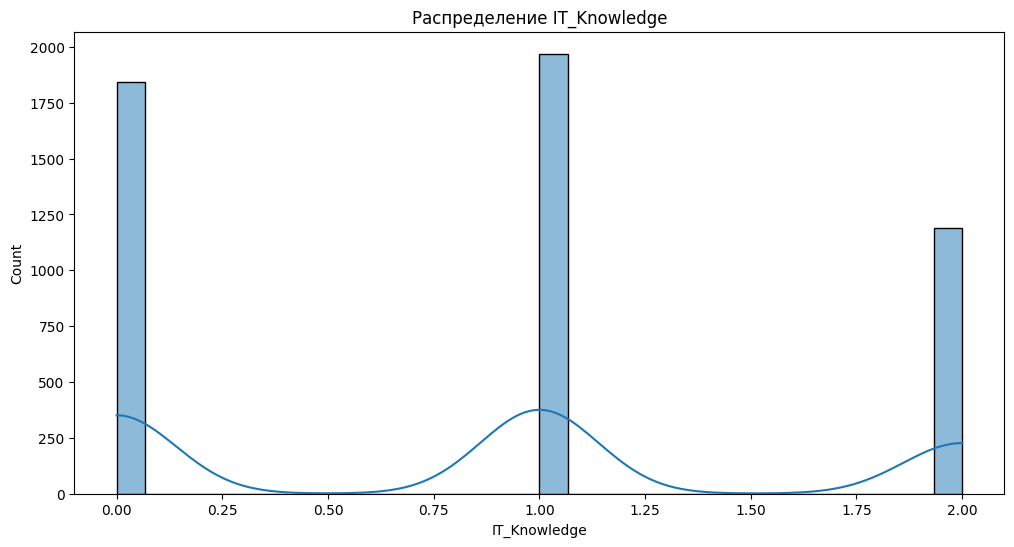


Age:
Shapiro-Wilk Test - Statistic: 0.924455374788982, p-value: 1.3127113024767427e-44
D'Agostino and Pearson's Test - Statistic: 6378.841040194805, p-value: 0.0
Anderson-Darling Test - Statistic: 105.11171540406667
Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]


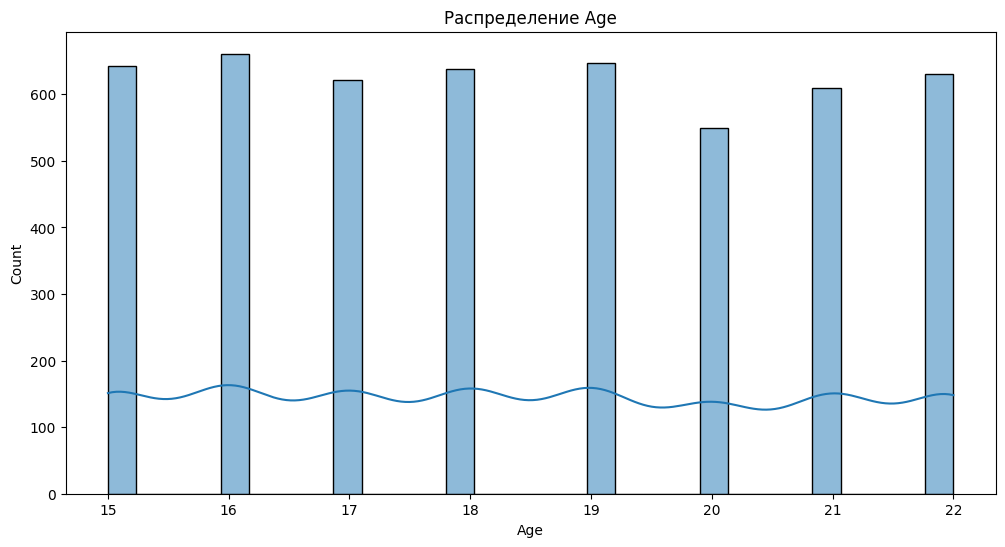


Socioeconomic_Status:
Shapiro-Wilk Test - Statistic: 0.7952202151382151, p-value: 4.906399042238517e-62
D'Agostino and Pearson's Test - Statistic: 4982.810408516769, p-value: 0.0
Anderson-Darling Test - Statistic: 417.07482831249945
Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]


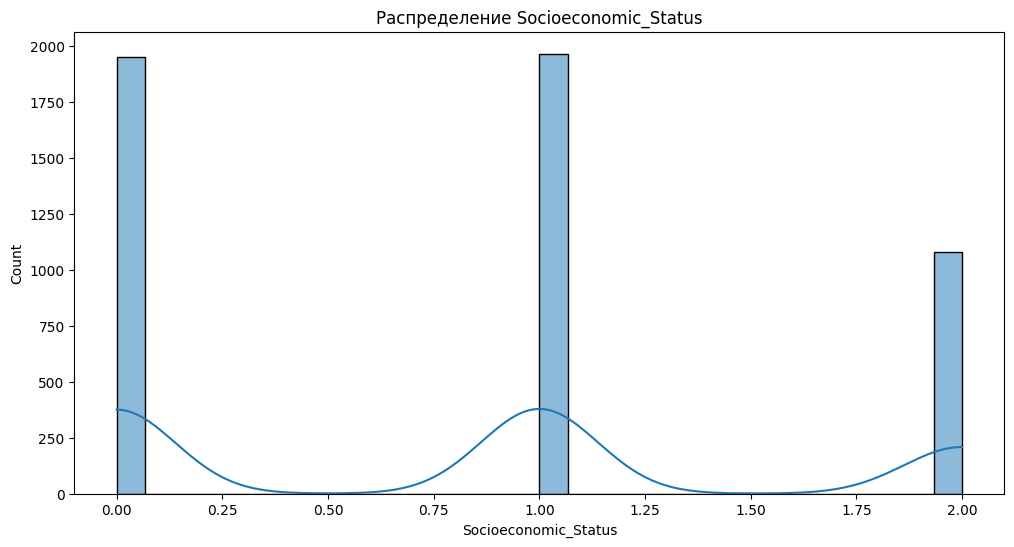


Parent_Education_Level:
Shapiro-Wilk Test - Statistic: 0.870639849307173, p-value: 1.2189261448497585e-53
D'Agostino and Pearson's Test - Statistic: 2816.710939561521, p-value: 0.0
Anderson-Darling Test - Statistic: 232.3472028522756
Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]


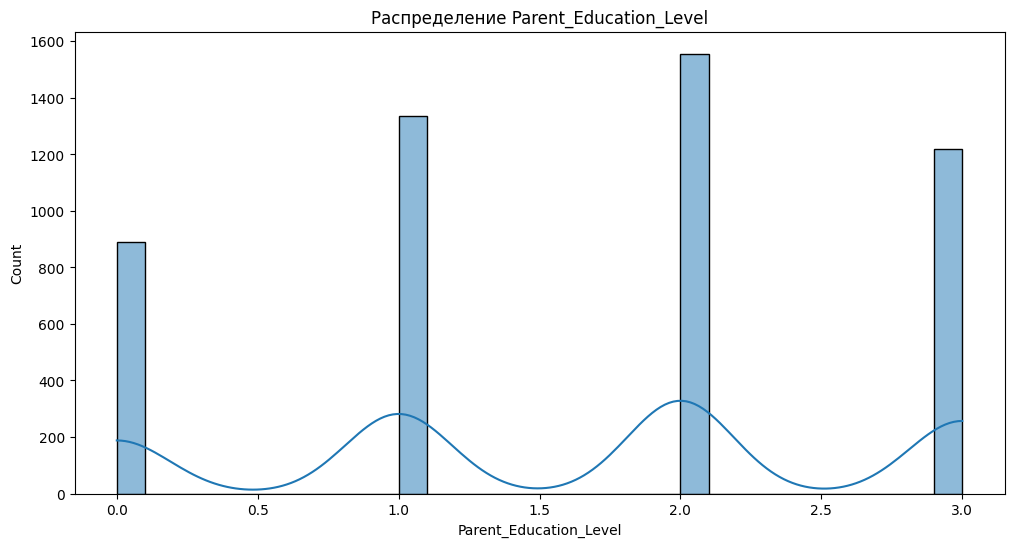


Assignments_Completed:
Shapiro-Wilk Test - Statistic: 0.7750307896529989, p-value: 7.847245035496767e-64
D'Agostino and Pearson's Test - Statistic: 718.4231633733724, p-value: 9.91727229654274e-157
Anderson-Darling Test - Statistic: 447.157910701726
Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]


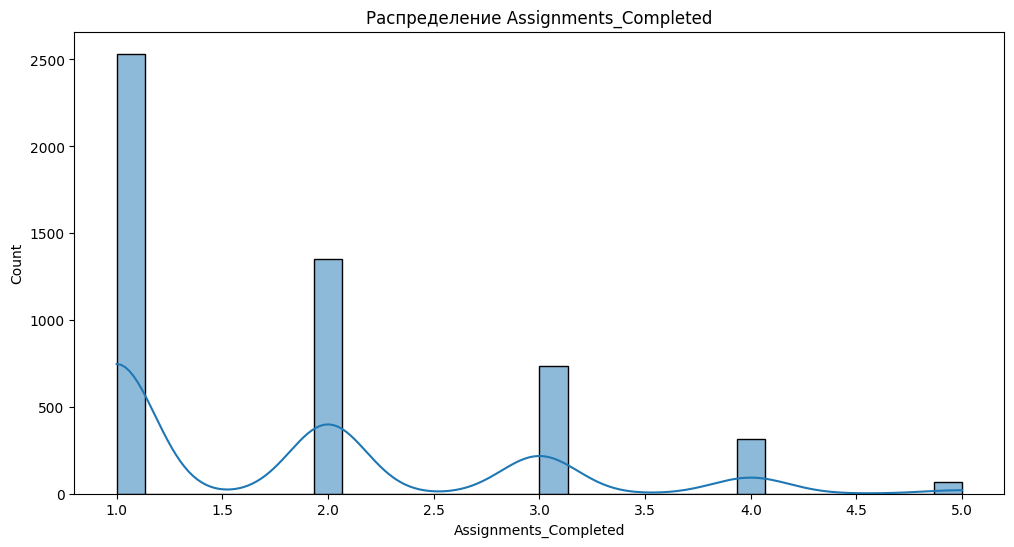

In [14]:
print("Смотрим распределения и проверяем их на нормальность:")
number_columns = df.select_dtypes(include=['number']).columns

for column in number_columns:
    print(f"\n{column}:")
    stat, p_value = shapiro(df[column])
    print(f"Shapiro-Wilk Test - Statistic: {stat}, p-value: {p_value}")
    stat, p_value = normaltest(df[column])
    print(f"D'Agostino and Pearson's Test - Statistic: {stat}, p-value: {p_value}")
    result = anderson(df[column])
    print(f"Anderson-Darling Test - Statistic: {result.statistic}")
    print(f"Critical Values: {result.critical_values}")
    print(f"Significance Levels: {result.significance_level}")
    plt.figure(figsize=(12, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Распределение {column}')
    plt.show()

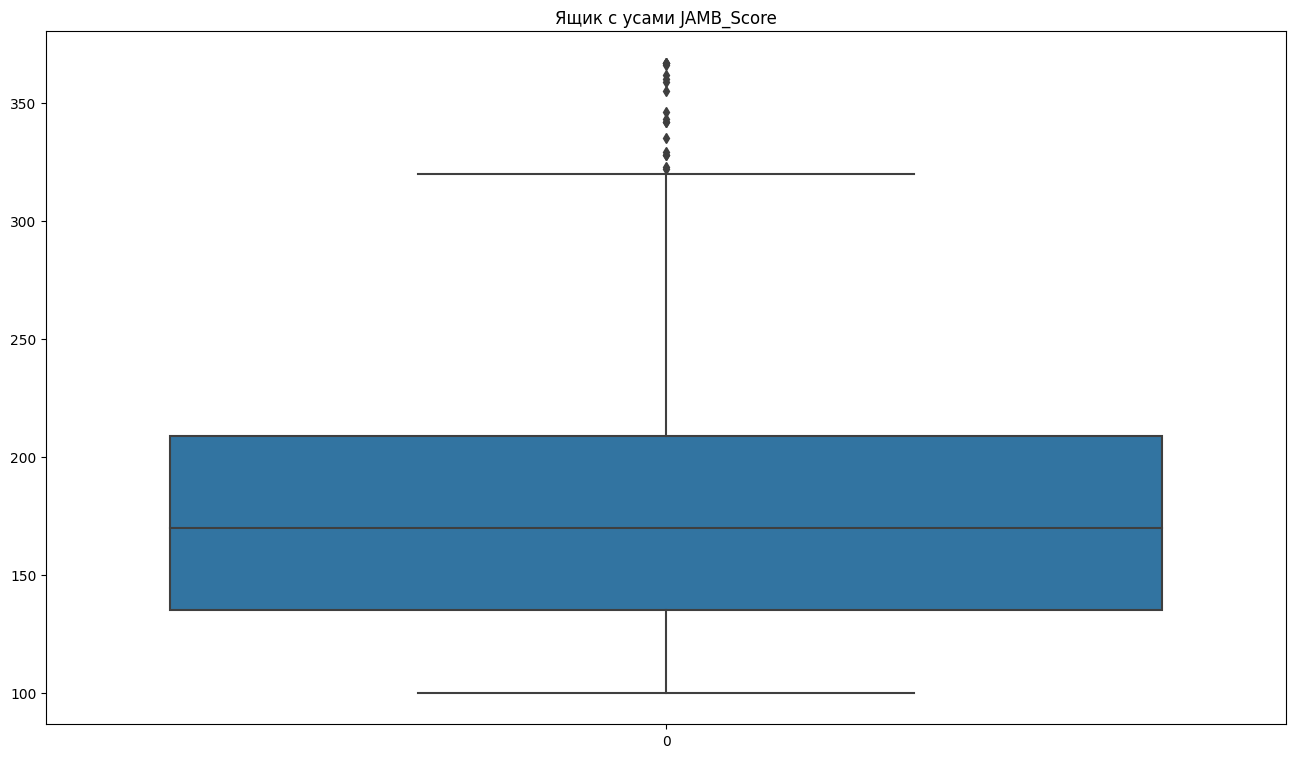

JAMB_Score
min 100 - max 367
lower_bound: 24.0 - 0 штук или 0.0%
upper_bound: 320.0 - 18 штук или 0.36%
all_bound: 24.0 - 320.0. 18 штук или 0.36%


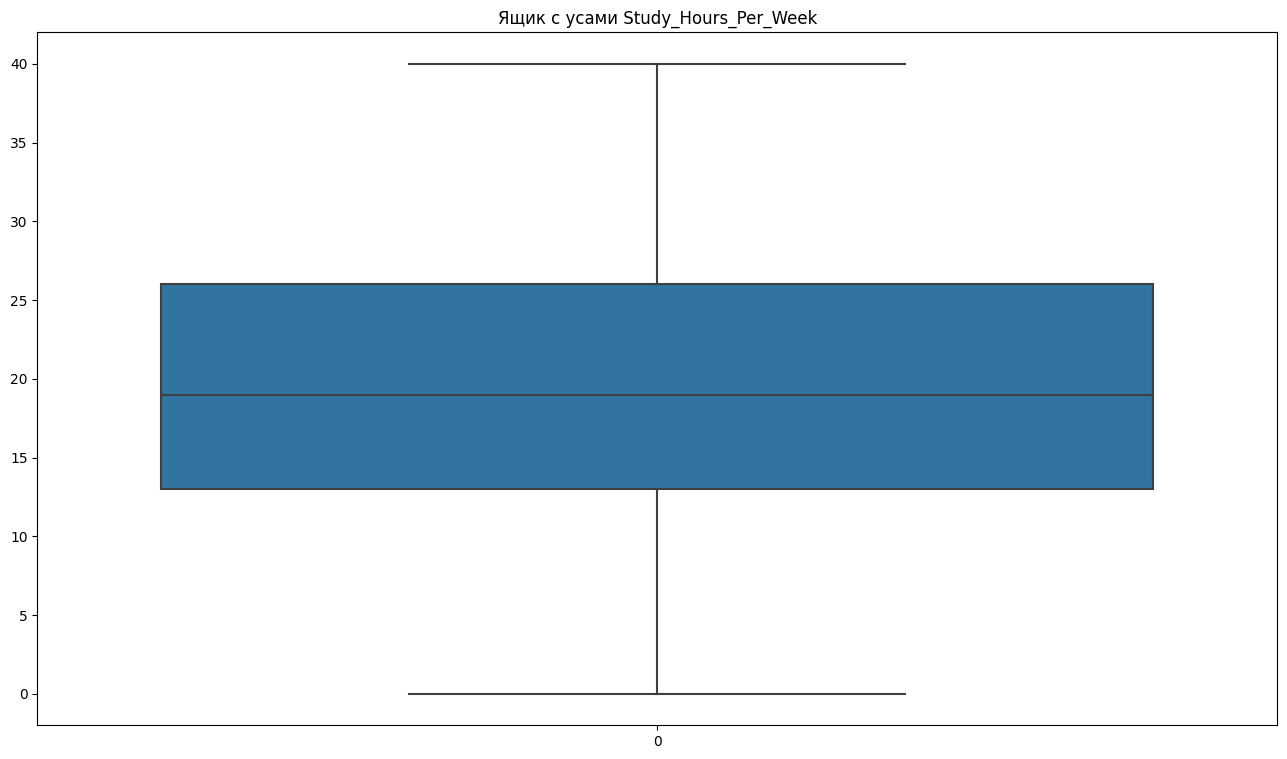

Study_Hours_Per_Week
min 0 - max 40
lower_bound: -6.5 - 0 штук или 0.0%
upper_bound: 45.5 - 0 штук или 0.0%
all_bound: -6.5 - 45.5. 0 штук или 0.0%


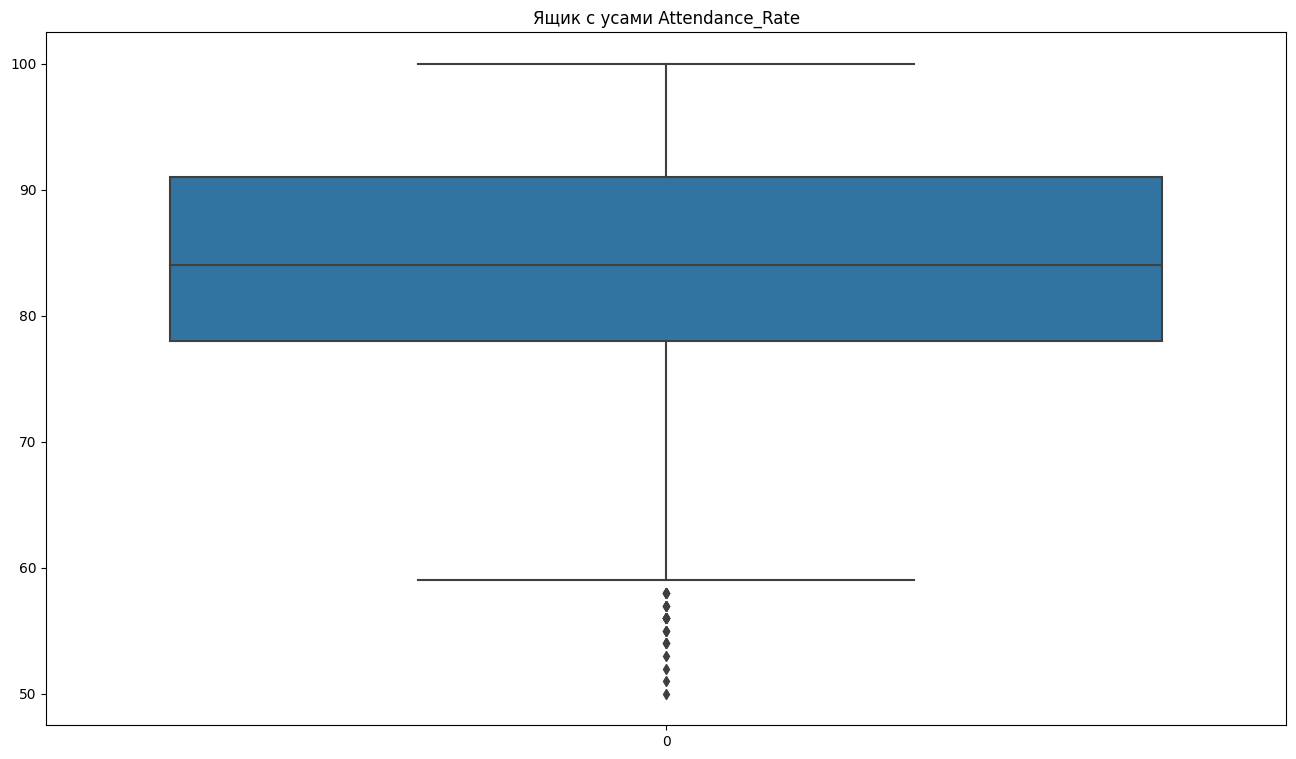

Attendance_Rate
min 50 - max 100
lower_bound: 58.5 - 29 штук или 0.58%
upper_bound: 110.5 - 0 штук или 0.0%
all_bound: 58.5 - 110.5. 29 штук или 0.58%


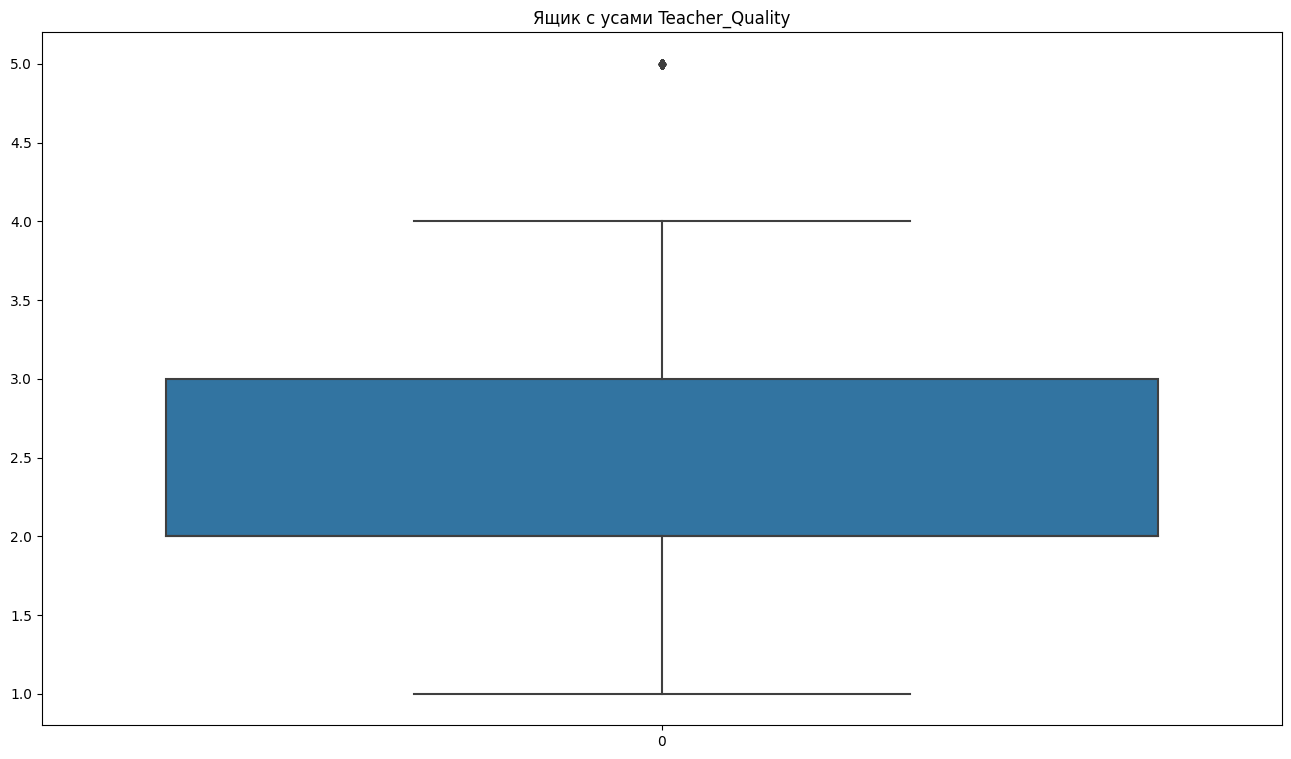

Teacher_Quality
min 1 - max 5
lower_bound: 0.5 - 0 штук или 0.0%
upper_bound: 4.5 - 115 штук или 2.3%
all_bound: 0.5 - 4.5. 115 штук или 2.3%


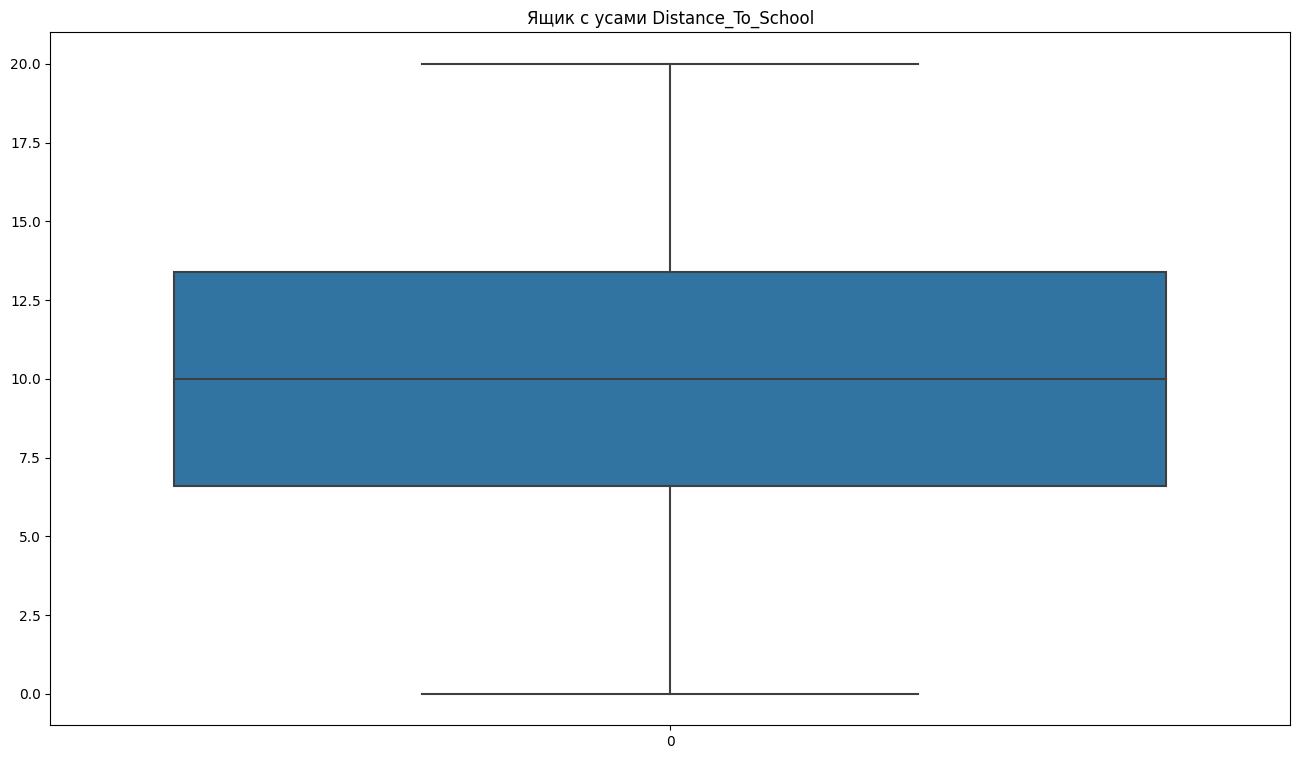

Distance_To_School
min 0.0 - max 20.0
lower_bound: -3.6000000000000014 - 0 штук или 0.0%
upper_bound: 23.6 - 0 штук или 0.0%
all_bound: -3.6000000000000014 - 23.6. 0 штук или 0.0%


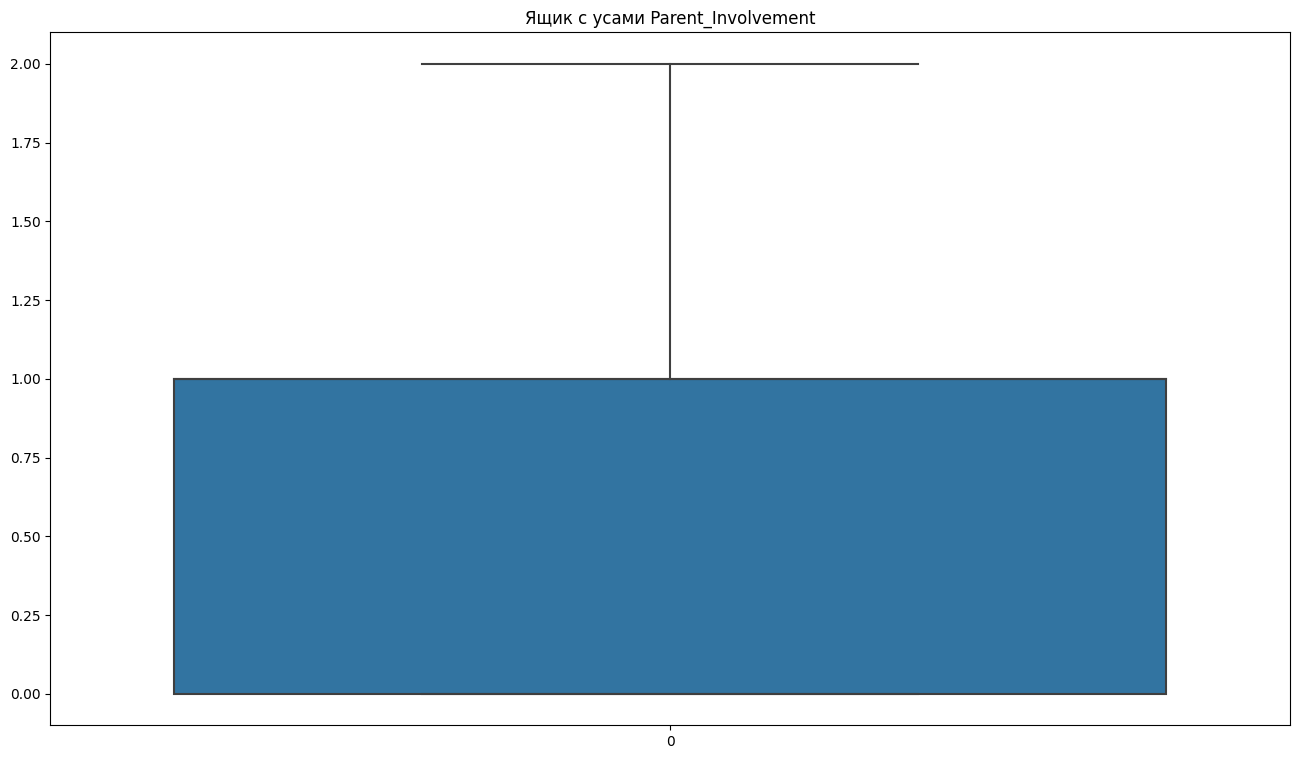

Parent_Involvement
min 0 - max 2
lower_bound: -1.5 - 0 штук или 0.0%
upper_bound: 2.5 - 0 штук или 0.0%
all_bound: -1.5 - 2.5. 0 штук или 0.0%


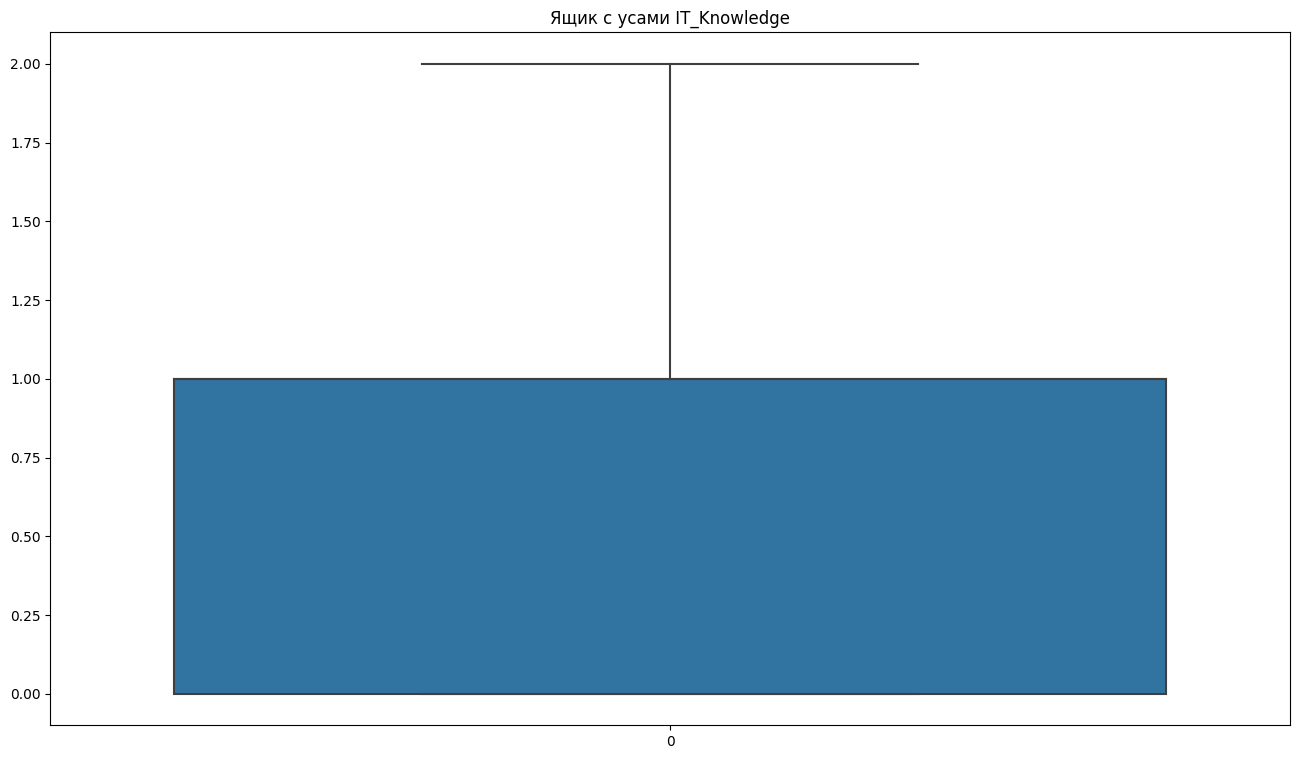

IT_Knowledge
min 0 - max 2
lower_bound: -1.5 - 0 штук или 0.0%
upper_bound: 2.5 - 0 штук или 0.0%
all_bound: -1.5 - 2.5. 0 штук или 0.0%


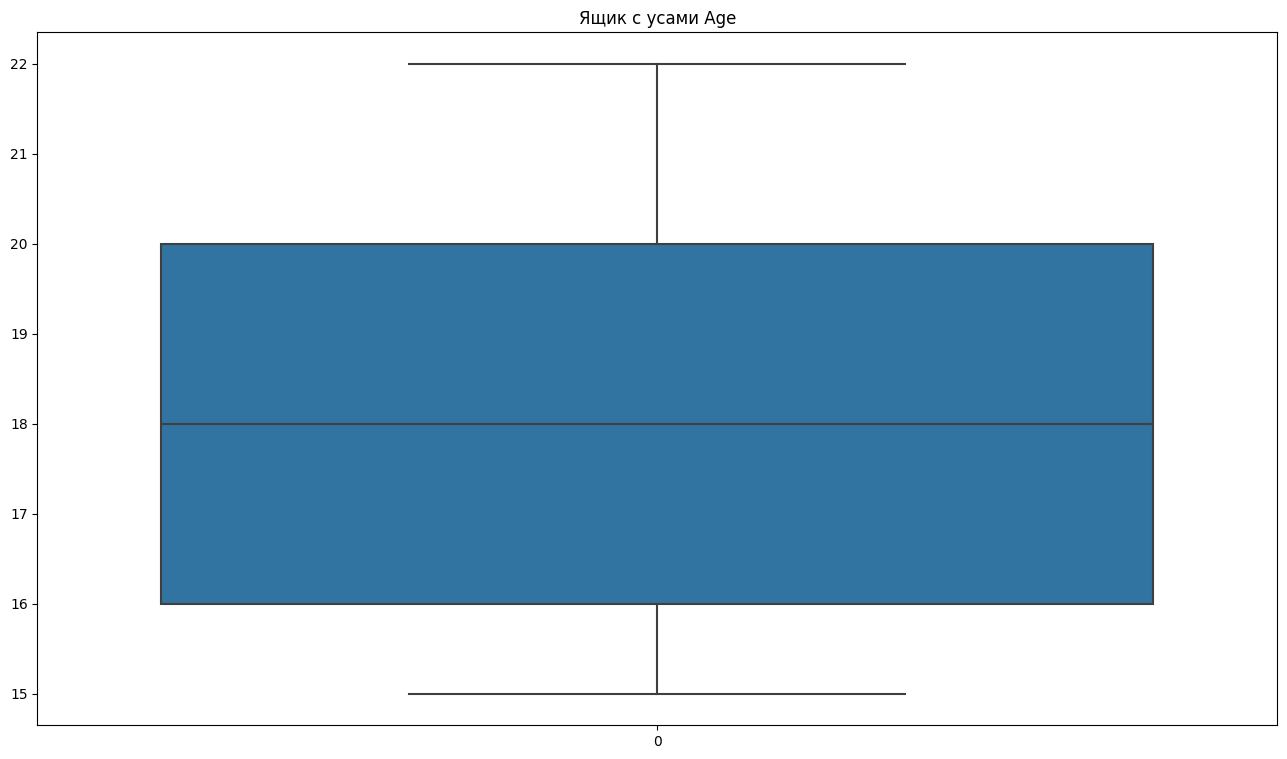

Age
min 15 - max 22
lower_bound: 10.0 - 0 штук или 0.0%
upper_bound: 26.0 - 0 штук или 0.0%
all_bound: 10.0 - 26.0. 0 штук или 0.0%


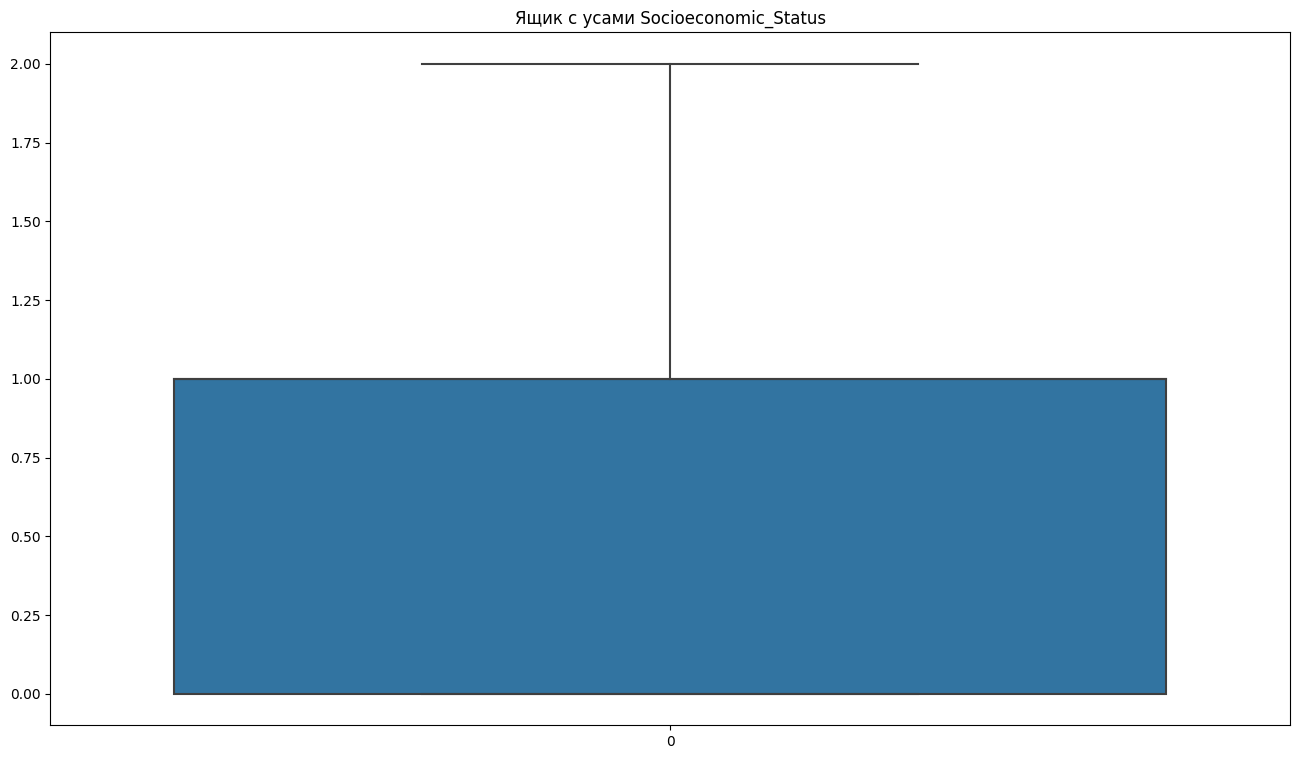

Socioeconomic_Status
min 0 - max 2
lower_bound: -1.5 - 0 штук или 0.0%
upper_bound: 2.5 - 0 штук или 0.0%
all_bound: -1.5 - 2.5. 0 штук или 0.0%


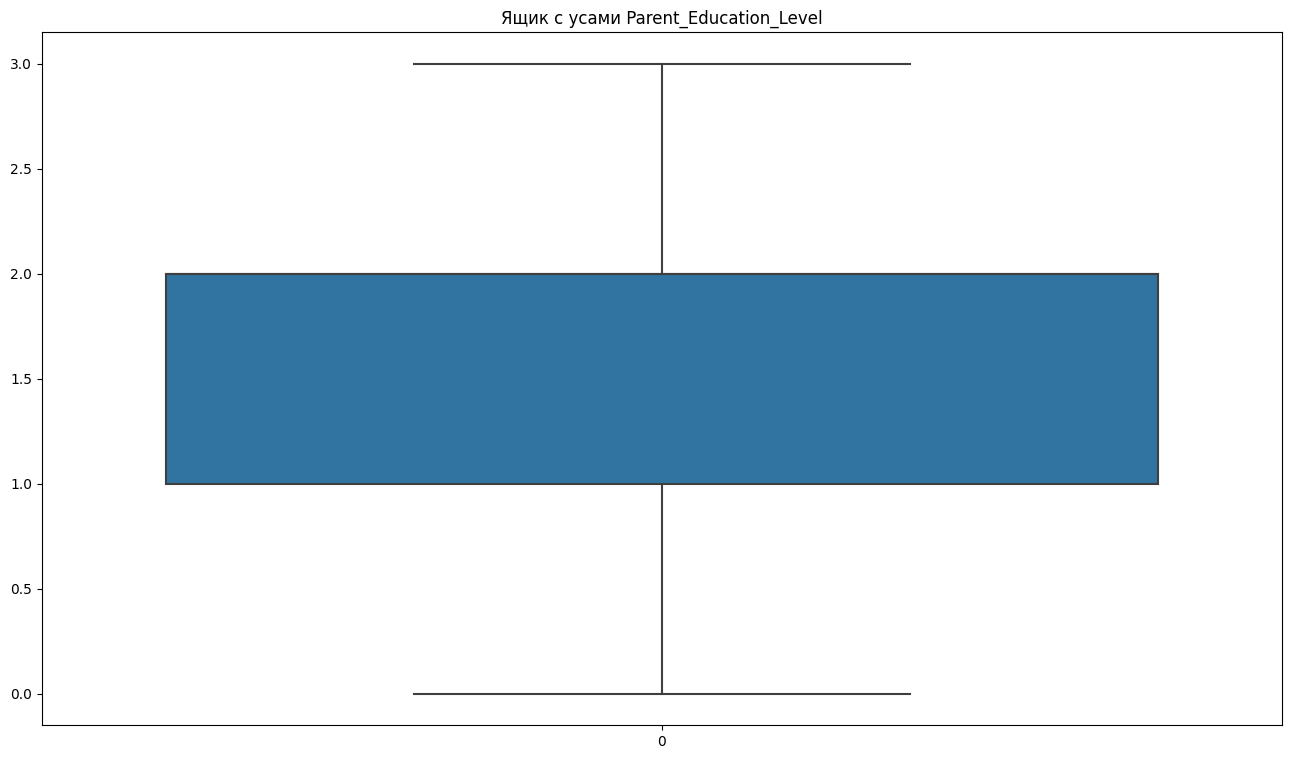

Parent_Education_Level
min 0 - max 3
lower_bound: -0.5 - 0 штук или 0.0%
upper_bound: 3.5 - 0 штук или 0.0%
all_bound: -0.5 - 3.5. 0 штук или 0.0%


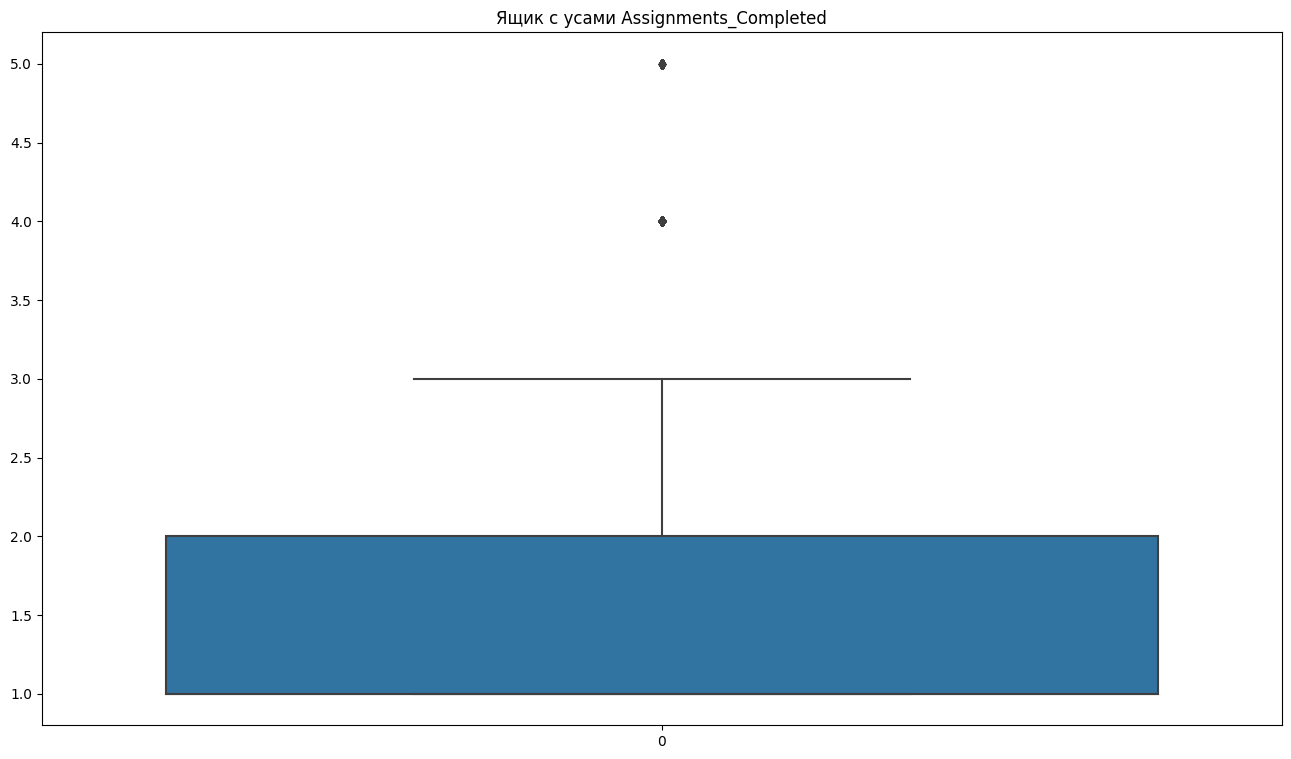

Assignments_Completed
min 1 - max 5
lower_bound: -0.5 - 0 штук или 0.0%
upper_bound: 3.5 - 378 штук или 7.56%
all_bound: -0.5 - 3.5. 378 штук или 7.56%


In [20]:
#Смотрим на выбросы и думаем что выброс, а что нет. Например 300 и более баллов на экзамене с максимумом в 400
size=df.count()[0]
for column in number_columns:
    plt.figure(figsize=(16,9))
    sns.boxplot(df[column]);
    plt.title(f'Ящик с усами {column}')
    plt.show()
        
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    i=sum(df[column] < lower_bound)
    print(column)
    print(f'min {min(df[column])} - max {max(df[column])}')
    print(f'lower_bound: {lower_bound} - {i} штук или {round(i/size*100, 2)}%')
    j= sum(df[column] > upper_bound)
    print(f'upper_bound: {upper_bound} - {j} штук или {round(j/size*100, 2)}%')
    print(f'all_bound: {lower_bound} - {upper_bound}. {i+j} штук или {round((i+j)/size*100, 2)}%')
    


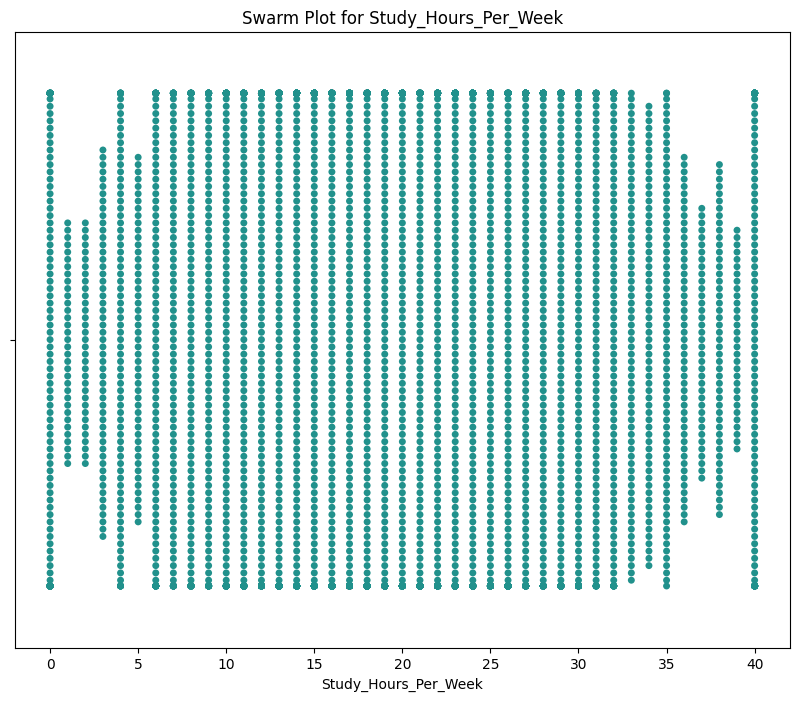

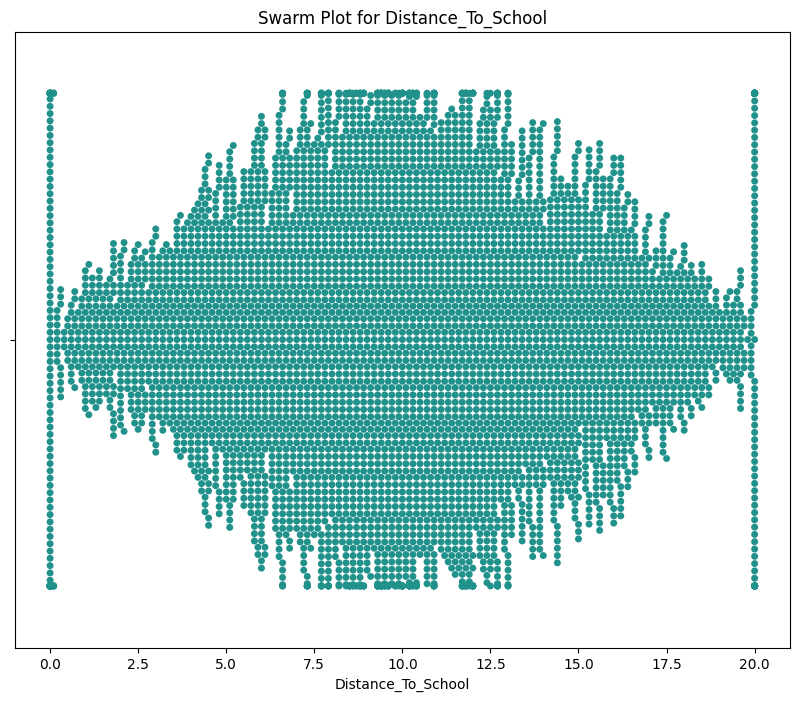

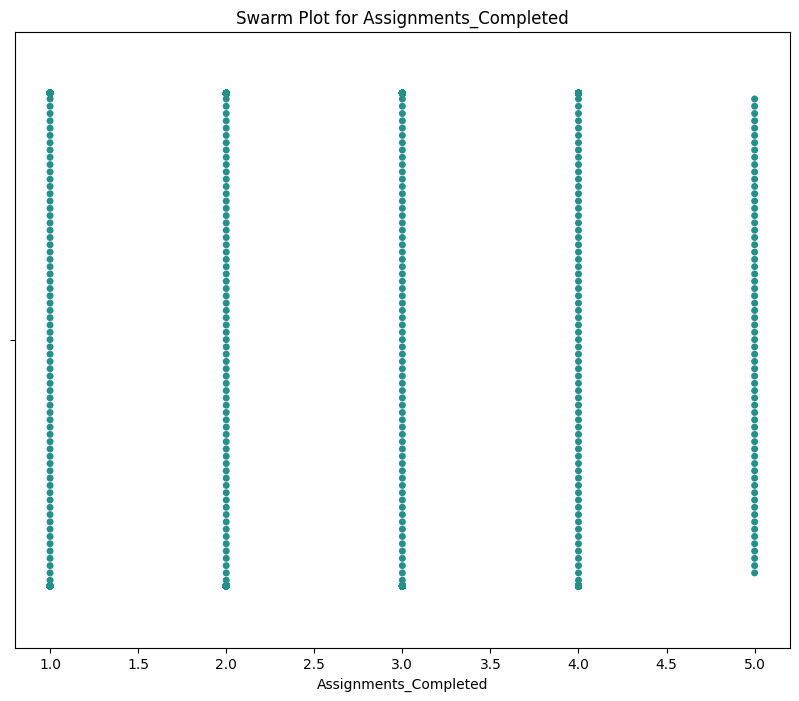

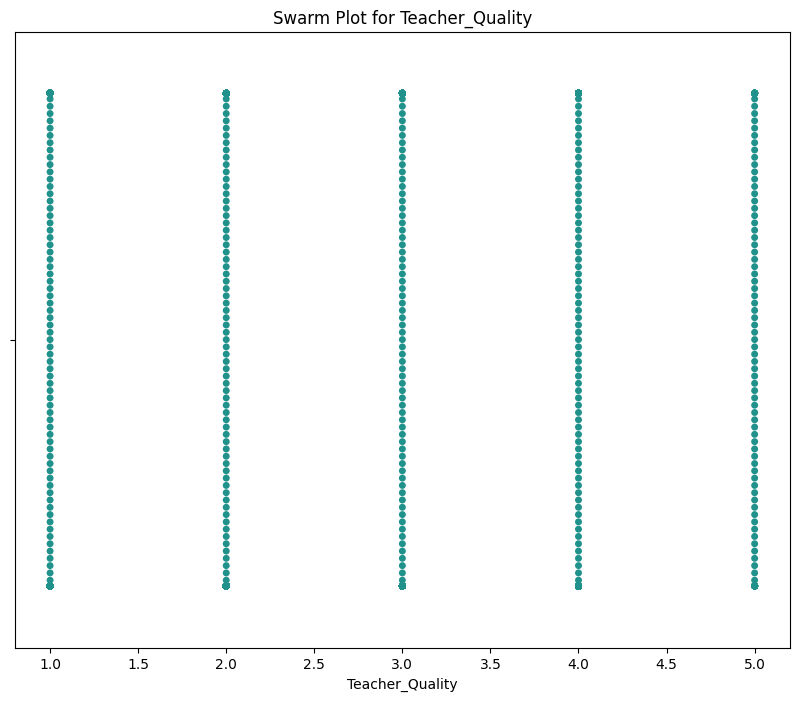

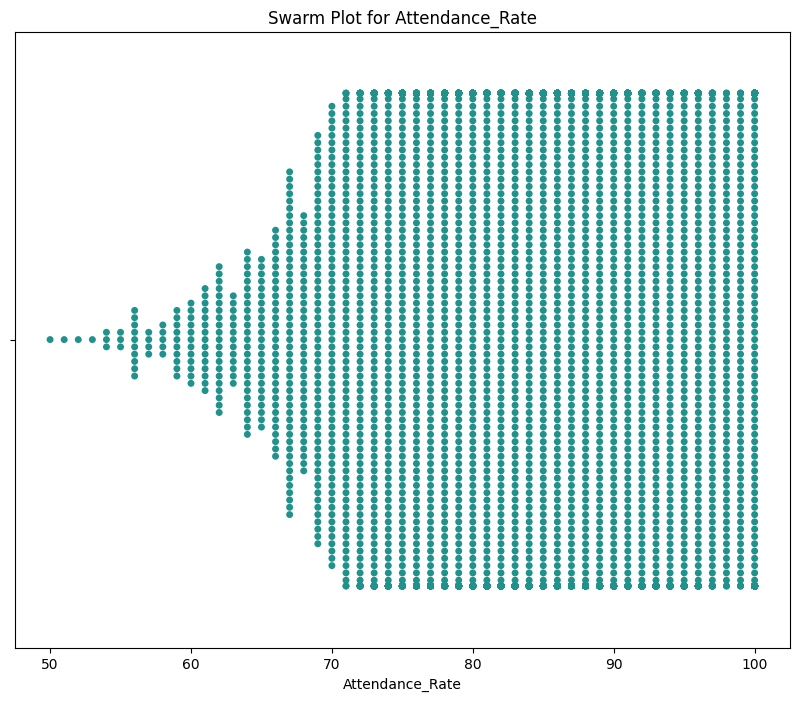

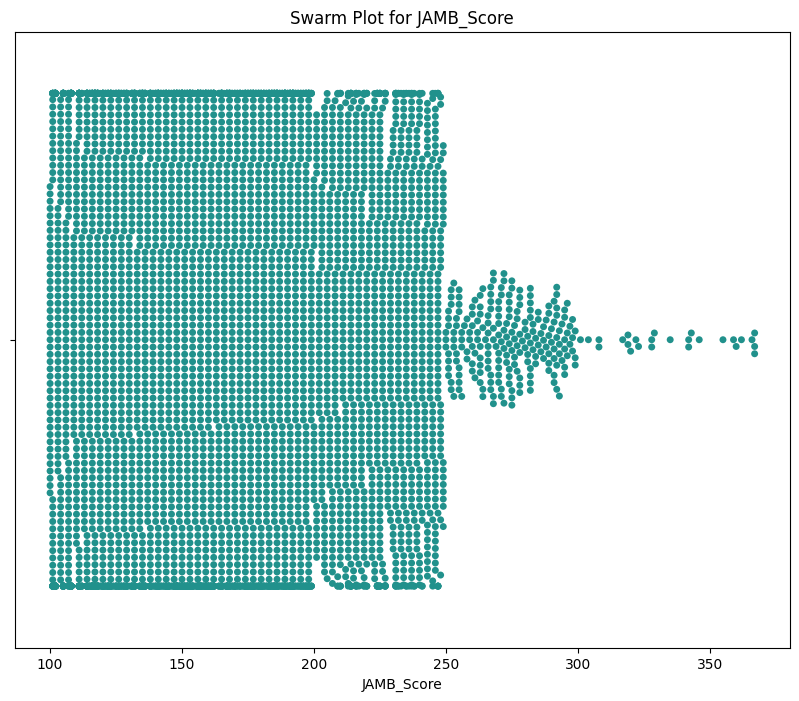

In [21]:
#Так тоже можно посмотреть и прикинуть выброс (да и дистанцию до учебного заведения лишний раз перепроверить)
if activate_all:
    for i in (['Study_Hours_Per_Week', 'Distance_To_School', 'Assignments_Completed', 'Teacher_Quality', 'Attendance_Rate', 'JAMB_Score']):
        plt.figure(figsize=(10, 8))
        sns.swarmplot(data=df, x=i,  palette='viridis')
        plt.title(f'Swarm Plot for {i}')
        plt.xlabel(i)
        plt.show()

#Код для выбросов в итоге пока не использую, но м.б. доработать для доп пометки выбросов без тзменения самих значений

for column in (['Attendance_Rate', 'Teacher_Quality', 'Assignments_Completed']):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    if sum(df[column] < lower_bound)>0:
        df['lower_bound_'+column] = df[column] < lower_bound
        df.loc[df['lower_bound_'+column], column]=lower_bound
    if sum(df[column] > upper_bound)>0:
        df['upper_bound_'+column] = df[column] < upper_bound
        df.loc[df['upper_bound_'+column], column]=upper_bound
    

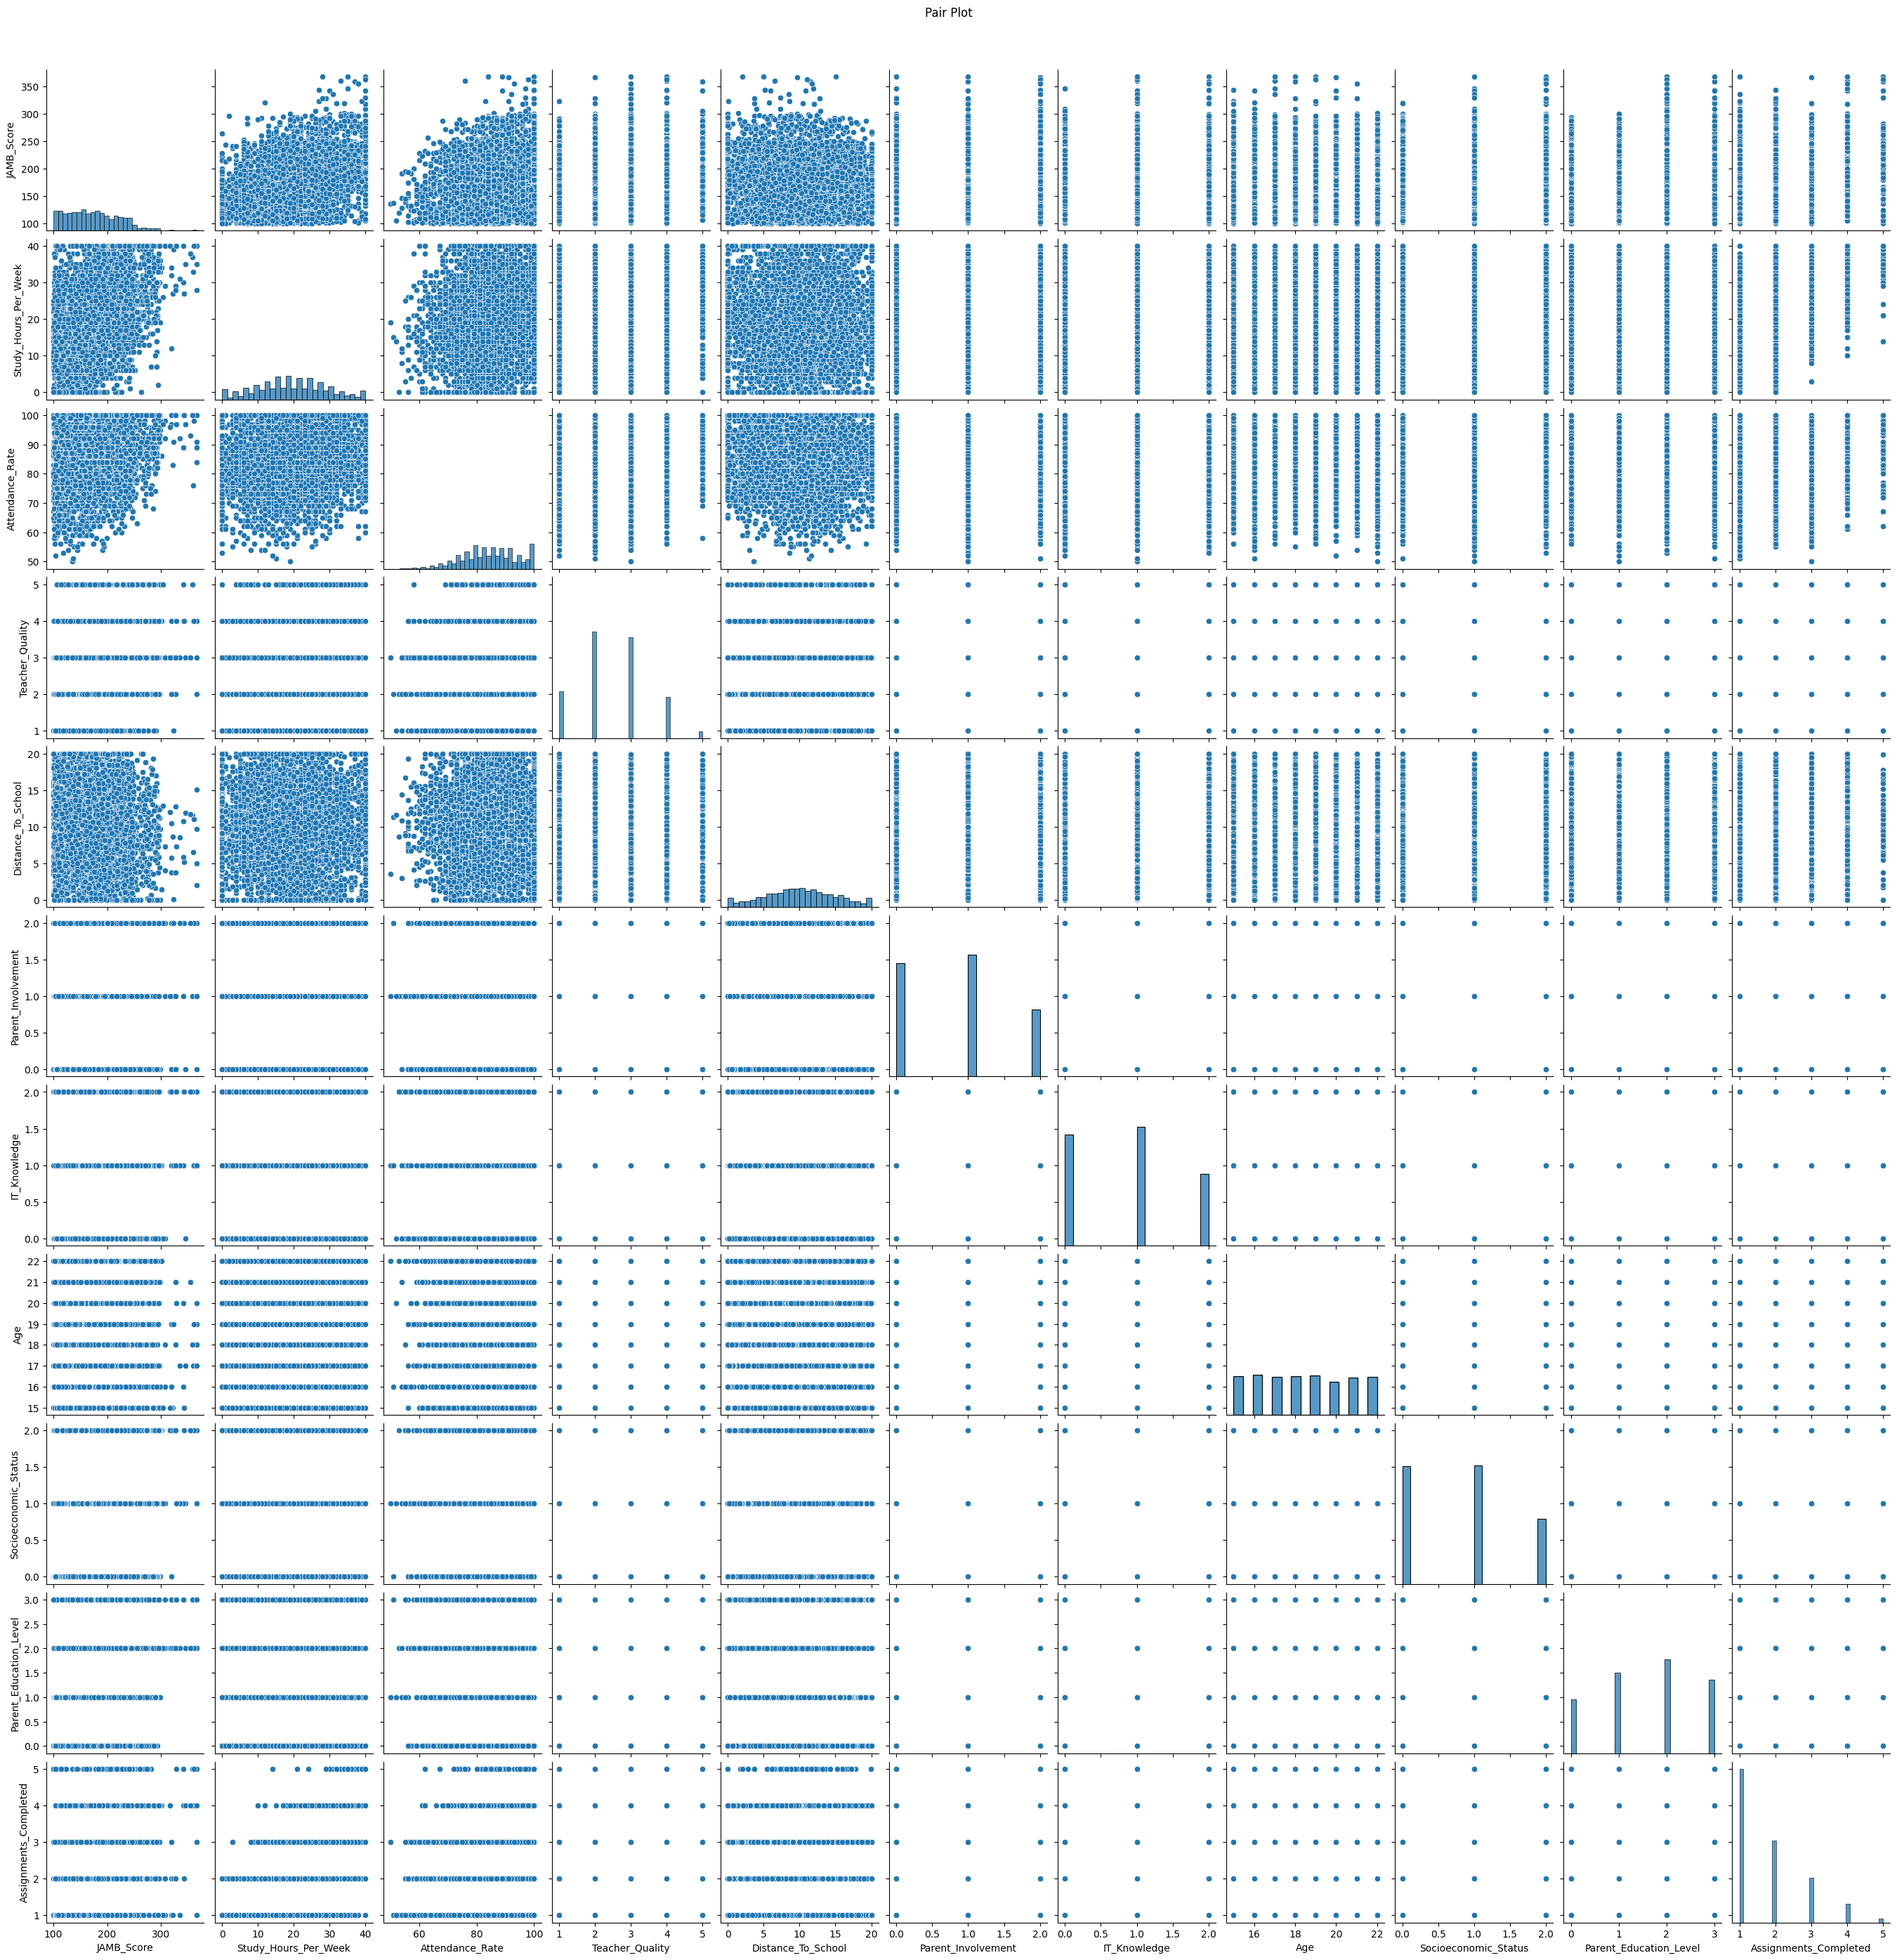

In [22]:
if activate_all:
    sns.pairplot(df)
    plt.suptitle('Pair Plot', y=1.02)
    plt.show()

#Тут видно лучше. Смотрим распределения между 2-мя столбцами и прикидываем направления и распределения
if activate_all:#но ждать конечно устаешь, так что подрубил переключатель
    for i in (number_columns):
        for j in (number_columns):
            if i!=j:
                #для удобства поиска
                print(f'Swarm Plot {i} vs {j}')
                plt.figure(figsize=(20, 14))
                sns.swarmplot(data=df, x=i, y=j, palette='viridis')
                plt.title(f'Swarm Plot {i} vs {j}')
                plt.xlabel(i)
                plt.ylabel(j)
            
                if df[i].unique().shape[0] > 10:
                    x_min, x_max = plt.xlim()
                    x_ticks = np.linspace(x_min, x_max, 10)
                    x_ticks_rounded = np.round(x_ticks, 3)
                    plt.xticks(x_ticks_rounded, labels=[f'{tick:.3f}' for tick in x_ticks_rounded])
                plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler 
#нормализуем
scaler = MinMaxScaler()
df[number_columns] = pd.DataFrame(scaler.fit_transform(df[number_columns]), columns=number_columns)
df.head()

JAMB_Score  Study_Hours_Per_Week  Attendance_Rate  Teacher_Quality  \
0    0.344569                 0.550             0.56             0.75   
1    0.400749                 0.350             0.76             0.75   
2    0.307116                 0.725             0.74             0.25   
3    0.411985                 0.725             0.98             0.25   
4    0.370787                 0.300             0.96             0.50   

   Distance_To_School School_Type School_Location Extra_Tutorials  \
0               0.620      Public           Urban             Yes   
1               0.135      Public           Rural              No   
2               0.480      Public           Rural             Yes   
3               0.130      Public           Urban              No   
4               0.440      Public           Urban              No   

  Access_To_Learning_Materials  Parent_Involvement  IT_Knowledge       Age  \
0                          Yes                 1.0           0.5  0.285714   
1                          Yes                 1.0           1.0  0.000000   
2                          Yes                 1.0           0.5  0.714286   
3                          Yes                 0.5           1.0  1.000000   
4                          Yes                 0.5           0.5  1.000000   

   Gender  Socioeconomic_Status  Parent_Education_Level  Assignments_Completed  
0    Male                   0.0                     1.0                   0.25  
1    Male                   1.0                     0.0                   0.00  
2  Female                   1.0                     1.0                   0.25  
3  Female                   0.5                     1.0                   0.00  
4  Female                   0.5                     1.0                   0.00

In [17]:
df.describe()

JAMB_Score  Study_Hours_Per_Week  Attendance_Rate  Teacher_Quality  \
count  5000.000000           5000.000000      5000.000000      5000.000000   
mean      0.277433              0.488030         0.684704         0.380350   
std       0.178339              0.240864         0.189714         0.246391   
min       0.000000              0.000000         0.000000         0.000000   
25%       0.131086              0.325000         0.560000         0.250000   
50%       0.262172              0.475000         0.680000         0.250000   
75%       0.408240              0.650000         0.820000         0.500000   
max       1.000000              1.000000         1.000000         1.000000   

       Distance_To_School  Parent_Involvement  IT_Knowledge          Age  \
count         5000.000000         5000.000000   5000.000000  5000.000000   
mean             0.500273            0.423400      0.434600     0.492257   
std              0.241011            0.378895      0.383735     0.328786   
min              0.000000            0.000000      0.000000     0.000000   
25%              0.330000            0.000000      0.000000     0.142857   
50%              0.500000            0.500000      0.500000     0.428571   
75%              0.670000            0.500000      0.500000     0.714286   
max              1.000000            1.000000      1.000000     1.000000   

       Socioeconomic_Status  Parent_Education_Level  Assignments_Completed  
count           5000.000000             5000.000000            5000.000000  
mean               0.413100                0.540067               0.201150  
std                0.379641                0.346309               0.248019  
min                0.000000                0.000000               0.000000  
25%                0.000000                0.333333               0.000000  
50%                0.500000                0.666667               0.000000  
75%                0.500000                0.666667               0.250000  
max                1.000000                1.000000               1.000000

In [18]:
#дэми переменные на не числовые столбцы
df=pd.get_dummies(df, drop_first=True)
basic_info(df)

Основная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   JAMB_Score                        5000 non-null   float64
 1   Study_Hours_Per_Week              5000 non-null   float64
 2   Attendance_Rate                   5000 non-null   float64
 3   Teacher_Quality                   5000 non-null   float64
 4   Distance_To_School                5000 non-null   float64
 5   Parent_Involvement                5000 non-null   float64
 6   IT_Knowledge                      5000 non-null   float64
 7   Age                               5000 non-null   float64
 8   Socioeconomic_Status              5000 non-null   float64
 9   Parent_Education_Level            5000 non-null   float64
 10  Assignments_Completed             5000 non-null   float64
 11  School_Type_Public                5000 non-null 

In [19]:
#мода
df.mode()#[0]

JAMB_Score  Study_Hours_Per_Week  Attendance_Rate  Teacher_Quality  \
0    0.067416                 0.475              1.0             0.25   

   Distance_To_School  Parent_Involvement  IT_Knowledge       Age  \
0                 0.0                 0.5           0.5  0.142857   

   Socioeconomic_Status  Parent_Education_Level  Assignments_Completed  \
0                   0.5                0.666667                    0.0   

   School_Type_Public  School_Location_Urban  Extra_Tutorials_Yes  \
0                True                   True                 True   

   Access_To_Learning_Materials_Yes  Gender_Male  
0                              True        False

In [20]:
#и пошли глядеть корреляции!
df.corr().JAMB_Score

JAMB_Score                          1.000000
Study_Hours_Per_Week                0.420061
Attendance_Rate                     0.280953
Teacher_Quality                     0.299505
Distance_To_School                 -0.094142
Parent_Involvement                  0.161842
IT_Knowledge                        0.159027
Age                                -0.028432
Socioeconomic_Status                0.200214
Parent_Education_Level              0.162214
Assignments_Completed               0.278079
School_Type_Public                 -0.087298
School_Location_Urban               0.027997
Extra_Tutorials_Yes                 0.067432
Access_To_Learning_Materials_Yes    0.047242
Gender_Male                        -0.014638
Name: JAMB_Score, dtype: float64

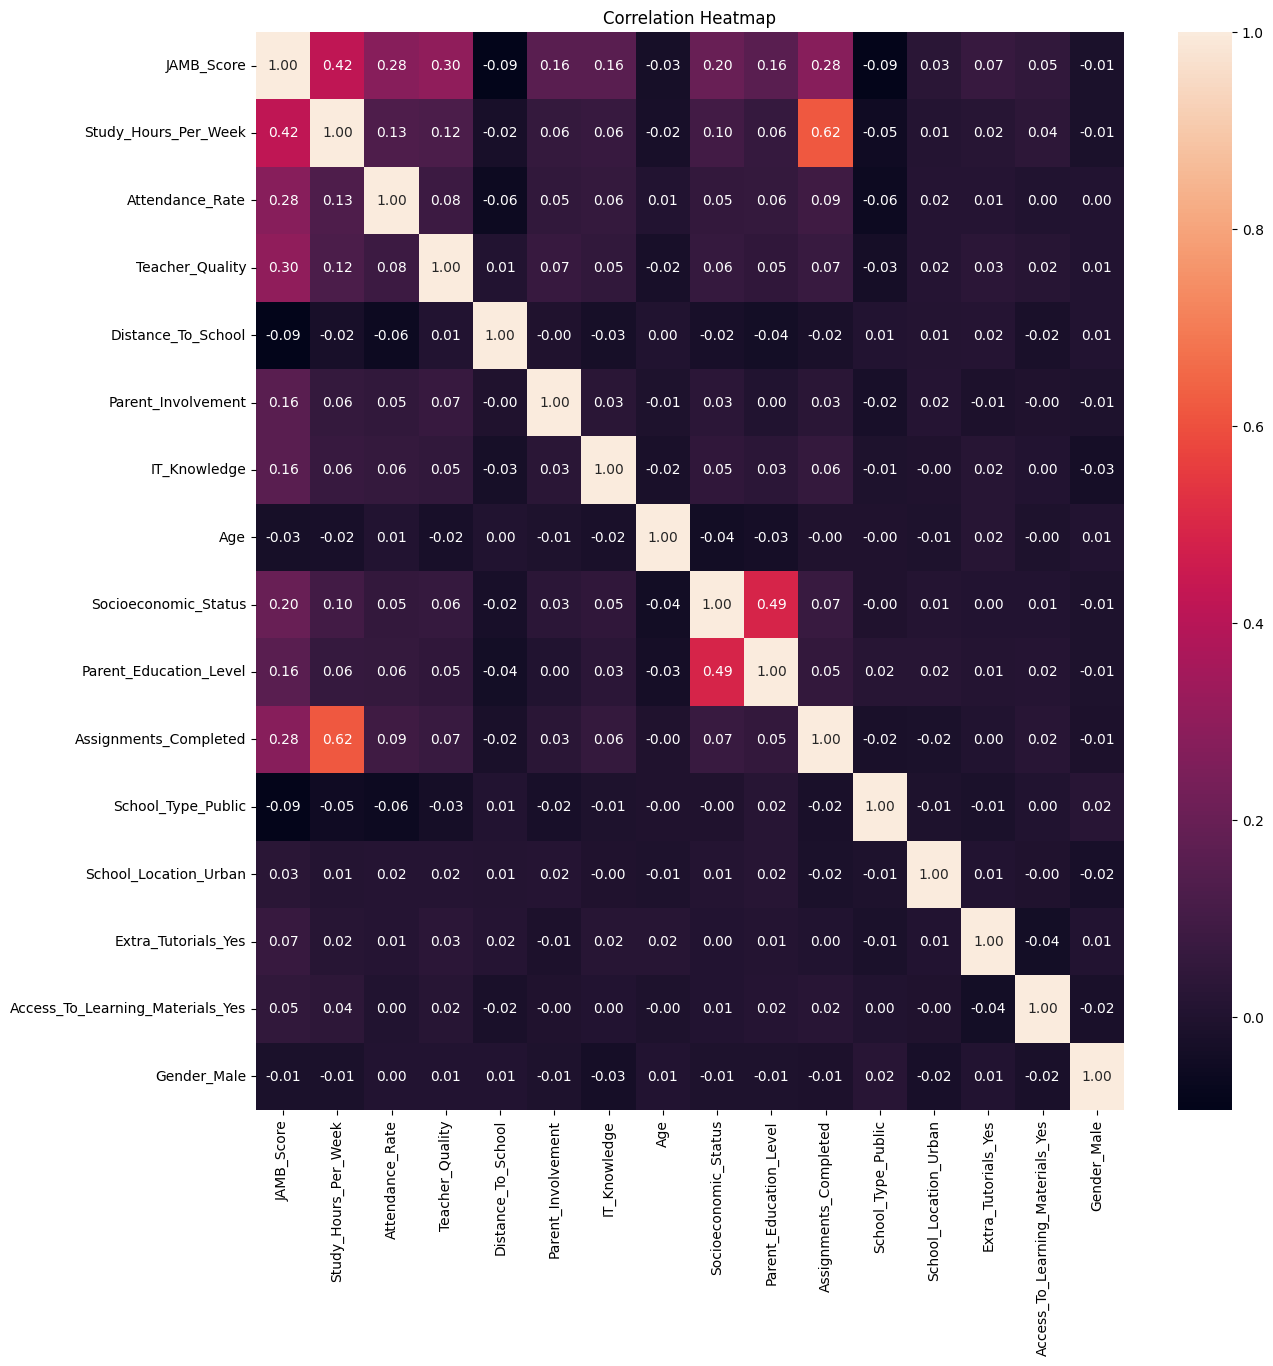

In [21]:
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


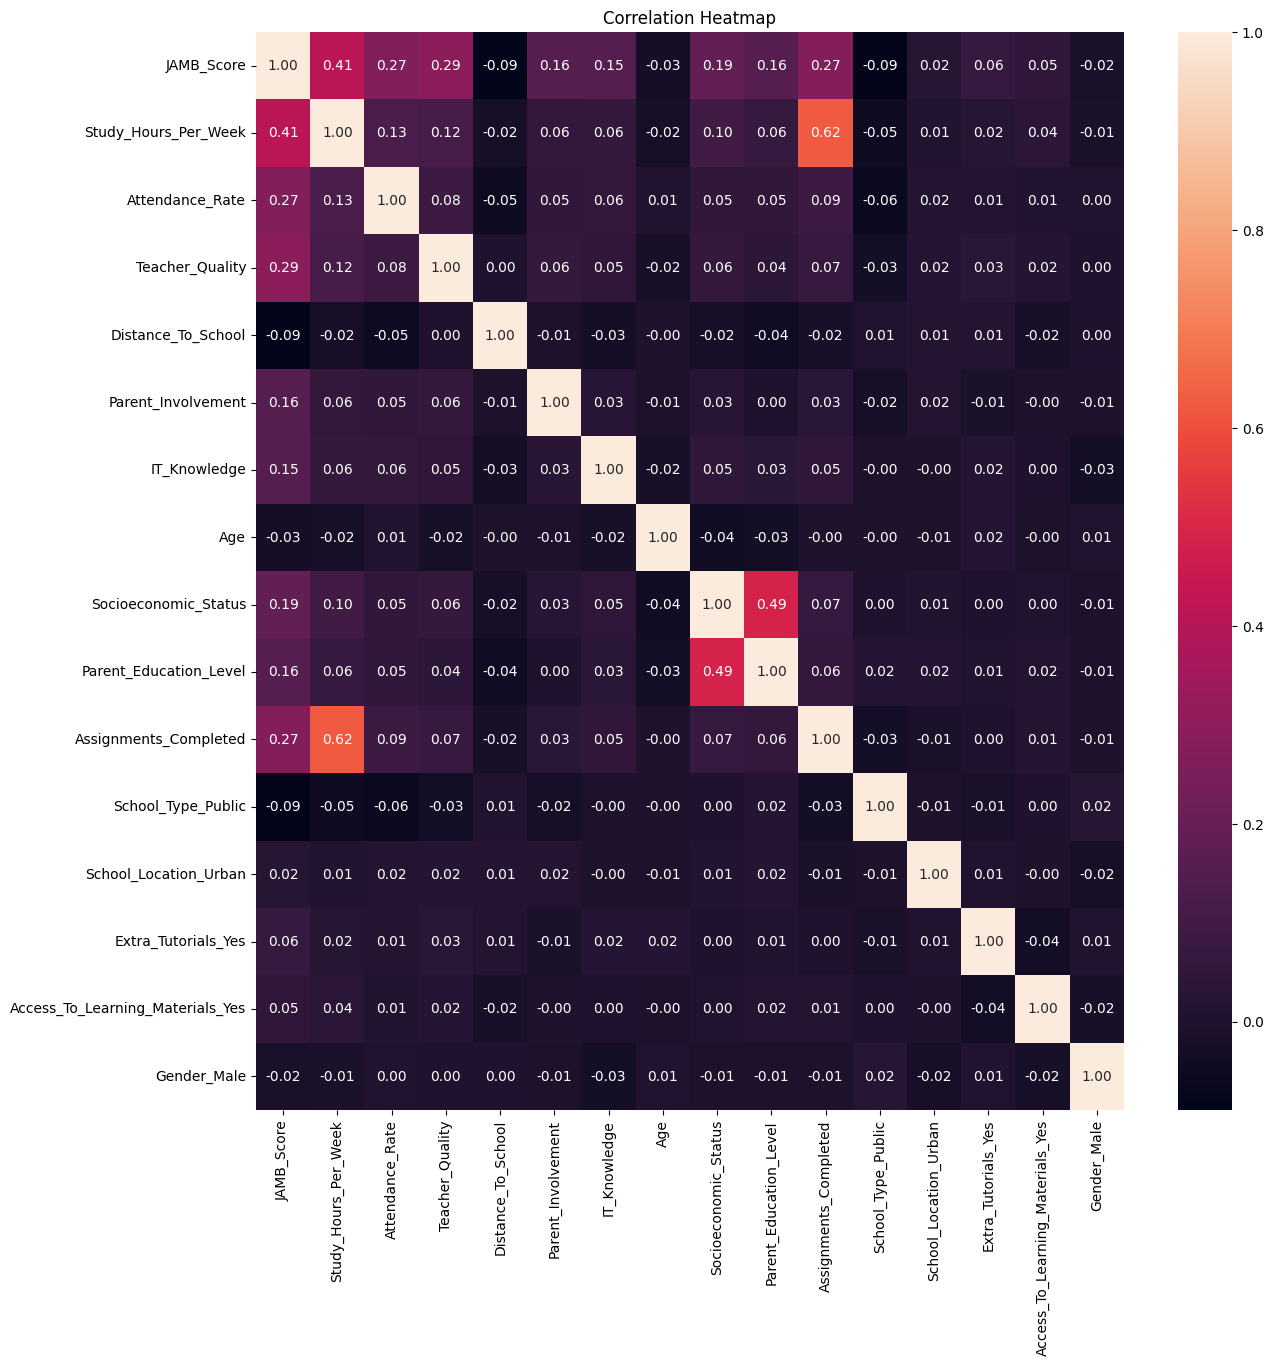

In [22]:
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(method='spearman'), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


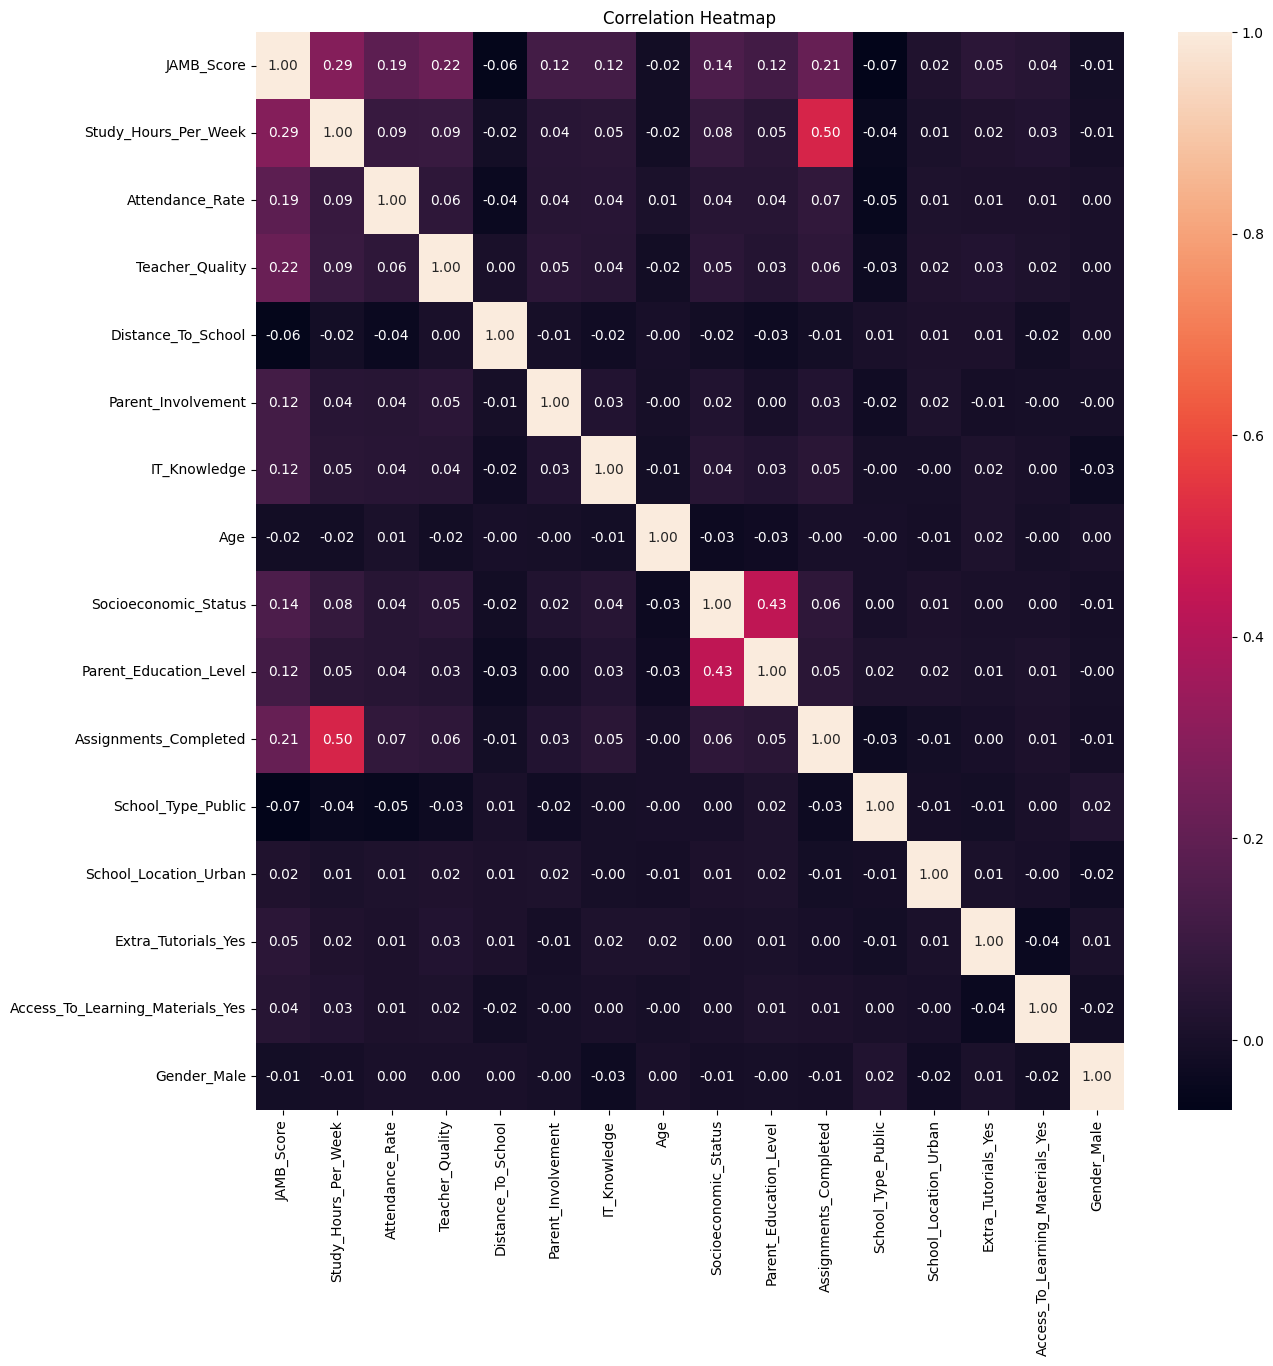

In [23]:
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(method='kendall'), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
#Очень интересные корреляции в отсутствующих значениях и социальных данных. Study hours, Attendance Rate, Teacher Quality и Assignment Status тоже довольно хорошо коррелируют
#Ну и ожидаемо негативное влияние низких социальных параметров
#А вот пол, возраст и тип местности не настолько важны 


ждал более сильнофй корреляции мкежду часами и посещаемостью, если честно

Также уже видны параметры слабо коррелирующие с целевым

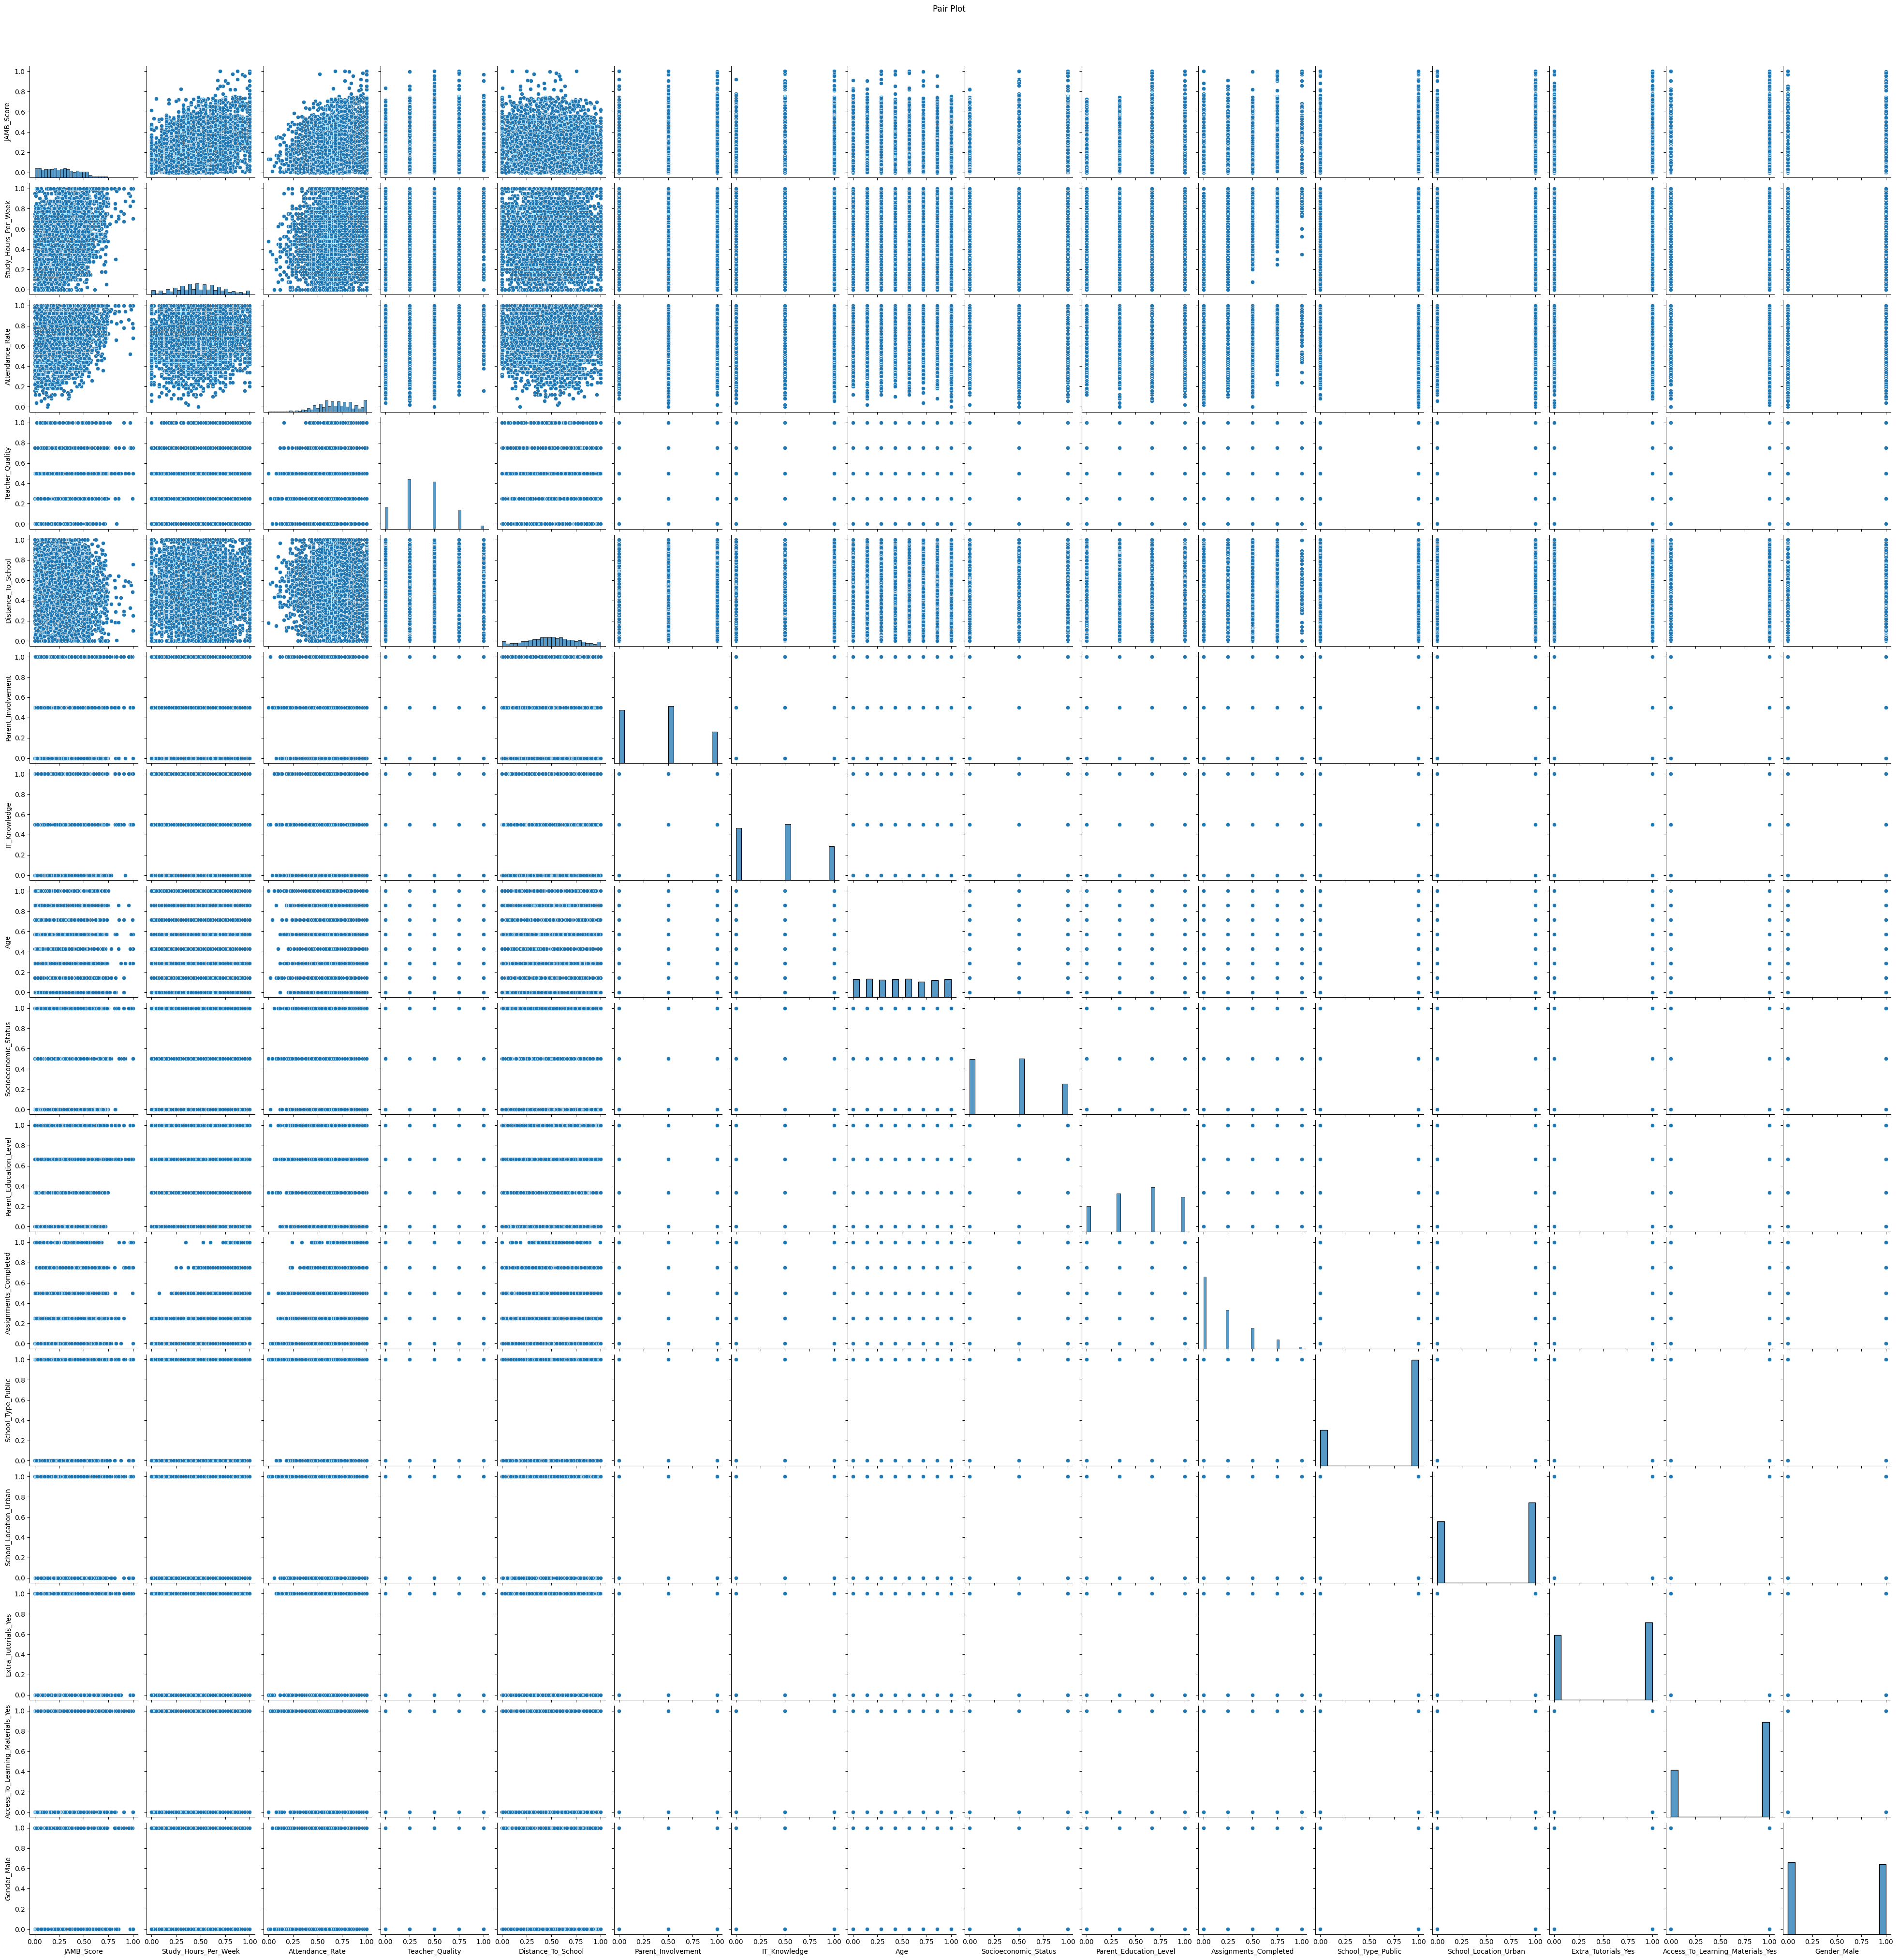

In [24]:
if activate_all: 
    sns.pairplot(df)
    plt.suptitle('Pair Plot', y=1.02)
    plt.show()

In [ ]:
#Удаляем столбцы с низкой привязкой к искомому
df=df.drop(['Age', 'School_Location_Urban', 'Gender_Male'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
i='JAMB_Score'

y = df[i]
X = df.drop(i, axis=1)




In [ ]:
#обрабатываем колонки с высокой взаимной корреляцией
X['Study_Attendance'] = X['Study_Hours_Per_Week']  * X['Attendance_Rate']  #* df[]
X['parent']=X['Socioeconomic_Status'] * X['Parent_Education_Level']
X=X.drop(['Study_Hours_Per_Week', 'Attendance_Rate'], axis=1)
X=X.drop(['Socioeconomic_Status', 'Parent_Education_Level', 'Assignments_Completed'], axis=1)



In [ ]:
#учебная и тестовая
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#обучаем и тестим

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
#смотрим метрики
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print('Mean Squared Error:',mse)
print('R-squared:', r2)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Mean Squared Error: 0.021175554364970067
R-squared: 0.37449299224476096
                                  Coefficient
Teacher_Quality                      0.152028
Distance_To_School                  -0.057671
Parent_Involvement                   0.049895
IT_Knowledge                         0.047248
School_Type_Public                  -0.020439
Extra_Tutorials_Yes                  0.015168
Access_To_Learning_Materials_Yes     0.010597
Study_Attendance_Interaction         0.351766
parent                               0.078913
